In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
from datetime import date
from datetime import datetime

import plotly.graph_objs as go
import plotly.express as px

# tabular data
from tabulate import tabulate

### 1. Import the necessary libraries and read the data.

In [2]:
df_fifa=pd.read_csv("fifa.csv")
df_fifa.head(2)

ID        Name  Age                                           Photo  \
0  240331   P. Camará   21  https://cdn.sofifa.org/players/4/19/240331.png   
1  183465  J. Rodwell   27  https://cdn.sofifa.org/players/4/19/183465.png   

     Nationality                                  Flag  Overall  Potential  \
0  Guinea Bissau  https://cdn.sofifa.org/flags/119.png       58         69   
1        England   https://cdn.sofifa.org/flags/14.png       68         68   

               Club                                        Club Logo  ...  \
0      Crawley Town  https://cdn.sofifa.org/teams/2/light/110890.png  ...   
1  Blackburn Rovers       https://cdn.sofifa.org/teams/2/light/3.png  ...   

  Composure Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
0      46.0    14.0           18.0           15.0       7.0         9.0   
1      69.0    66.0           69.0           64.0       9.0        10.0   

  GKKicking GKPositioning GKReflexes  Release Clause  
0       9.0           6.0       15.0           €429K  
1      15.0          11.0       12.0           €1.8M  

[2 rows x 60 columns]

In [3]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25490 entries, 0 to 25489
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        25490 non-null  int64  
 1   Name                      25490 non-null  object 
 2   Age                       25490 non-null  int64  
 3   Photo                     25490 non-null  object 
 4   Nationality               25490 non-null  object 
 5   Flag                      25490 non-null  object 
 6   Overall                   25490 non-null  int64  
 7   Potential                 25490 non-null  int64  
 8   Club                      25159 non-null  object 
 9   Club Logo                 25490 non-null  object 
 10  Value                     25490 non-null  object 
 11  Wage                      25490 non-null  object 
 12  Preferred Foot            25425 non-null  object 
 13  International Reputation  25425 non-null  float64
 14  Weak F

In [4]:
df_fifa.isnull().sum()*100/len(df_fifa)

ID                           0.000000
Name                         0.000000
Age                          0.000000
Photo                        0.000000
Nationality                  0.000000
Flag                         0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.298548
Club Logo                    0.000000
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.255002
International Reputation     0.255002
Weak Foot                    0.255002
Skill Moves                  0.255002
Work Rate                    0.255002
Body Type                    0.255002
Position                     0.349157
Jersey Number                0.349157
Joined                       8.517066
Loaned From                 93.036485
Contract Valid Until         1.553550
Height                       0.255002
Weight                       0.255002
Crossing                     0.255002
Finishing   

### 2. Drop any columns that you deem unnecessary for analysis

Hint: At least keep the following columns

['ID','Name','Age','Nationality','Overall','Potential','Value','Wage','Joined','Preferred Foot',
'Contract Valid Until', 'Height', 'Weight', 'Penalties', 'Release Clause',’ International
Reputation’, ‘Position’]

In [5]:
df_fifa.describe()

ID           Age       Overall     Potential  \
count   25490.000000  25490.000000  25490.000000  25490.000000   
mean   214357.925343     25.114162     66.261593     71.338486   
std     29878.130401      4.649341      6.843978      6.112496   
min        16.000000     16.000000     46.000000     48.000000   
25%    200353.750000     21.000000     62.000000     67.000000   
50%    221816.000000     25.000000     66.000000     71.000000   
75%    236545.000000     28.000000     71.000000     75.000000   
max    246620.000000     45.000000     94.000000     95.000000   

       International Reputation     Weak Foot   Skill Moves  Jersey Number  \
count              25425.000000  25425.000000  25425.000000   25401.000000   
mean                   1.109302      2.949656      2.368181      19.576788   
std                    0.385040      0.661157      0.758538      15.988779   
min                    1.000000      1.000000      1.000000       1.000000   
25%                    1.000000      3.000000      2.000000       9.000000   
50%                    1.000000      3.000000      2.000000      17.000000   
75%                    1.000000      3.000000      3.000000      26.000000   
max                    5.000000      5.000000      5.000000      99.000000   

           Crossing     Finishing  ...     Penalties     Composure  \
count  25425.000000  25425.000000  ...  25425.000000  25425.000000   
mean      49.881180     45.662694  ...     48.663559     58.749853   
std       18.356056     19.447835  ...     15.683216     11.387027   
min        5.000000      2.000000  ...      5.000000      3.000000   
25%       38.000000     30.000000  ...     39.000000     51.000000   
50%       54.000000     49.000000  ...     50.000000     60.000000   
75%       64.000000     62.000000  ...     60.000000     67.000000   
max       93.000000     94.000000  ...     90.000000     95.000000   

            Marking  StandingTackle  SlidingTackle      GKDiving  \
count  25425.000000    25425.000000   25425.000000  25425.000000   
mean      47.438033       47.816087      45.730305     16.568220   
std       19.768914       21.578577      21.181263     17.655976   
min        3.000000        2.000000       3.000000      1.000000   
25%       30.000000       27.000000      24.000000      8.000000   
50%       53.000000       55.000000      52.000000     11.000000   
75%       64.000000       66.000000      64.000000     14.000000   
max       94.000000       93.000000      91.000000     90.000000   

         GKHandling     GKKicking  GKPositioning    GKReflexes  
count  25425.000000  25425.000000   25425.000000  25425.000000  
mean      16.349066     16.230718      16.342852     16.665998  
std       16.848998     16.516029      16.982910     17.940949  
min        1.000000      1.000000       1.000000      1.000000  
25%        8.000000      8.000000       8.000000      8.000000  
50%       11.000000     11.000000      11.000000     11.000000  
75%       14.000000     14.000000      14.000000     14.000000  
max       92.000000     88.000000      90.000000     94.000000  

[8 rows x 42 columns]

In [6]:
df_fifa.describe(include="object")

Name                                           Photo  \
count         25490                                           25490   
unique        13053                                           13657   
top     R. Williams  https://cdn.sofifa.org/players/4/19/237679.png   
freq             13                                               8   

       Nationality                                 Flag    Club  \
count        25490                                25490   25159   
unique         160                                  160     651   
top        England  https://cdn.sofifa.org/flags/14.png  Empoli   
freq          2332                                 2332      64   

                                            Club Logo  Value   Wage  \
count                                           25490  25490  25490   
unique                                            678    204    140   
top     https://cdn.sofifa.org/teams/2/light/1746.png  €1.1M    €1K   
freq                                               64    621   6805   

       Preferred Foot       Work Rate Body Type Position       Joined  \
count           25425           25425     25425    25401        23319   
unique              2               9         9       27         1559   
top             Right  Medium/ Medium    Normal       ST  Jul 1, 2018   
freq            19454           13687     14870     2882         2169   

       Loaned From Contract Valid Until Height  Weight Release Clause  
count         1775                25094  25425   25425          23308  
unique         308                   34     21      56           1163  
top       Atalanta                 2019    6'0  165lbs          €1.1M  
freq            34                 6825   3940    2064            785

In [7]:
df_fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [8]:
# Photo, Flag, Club logo, ID, Loaned from can be droped

In [9]:
df=df_fifa.drop(['ID','Photo','Flag','Club Logo',"Loaned From"],axis=1)
df.head(3)

Name  Age    Nationality  Overall  Potential               Club  \
0     P. Camará   21  Guinea Bissau       58         69       Crawley Town   
1    J. Rodwell   27        England       68         68   Blackburn Rovers   
2  P. Gazzaniga   26      Argentina       74         78  Tottenham Hotspur   

   Value  Wage Preferred Foot  International Reputation  ...  Composure  \
0  €220K   €1K          Right                       1.0  ...       46.0   
1  €925K  €16K          Right                       2.0  ...       69.0   
2    €5M  €46K          Right                       1.0  ...       55.0   

   Marking StandingTackle SlidingTackle GKDiving  GKHandling GKKicking  \
0     14.0           18.0          15.0      7.0         9.0       9.0   
1     66.0           69.0          64.0      9.0        10.0      15.0   
2     23.0           20.0          11.0     76.0        73.0      84.0   

  GKPositioning GKReflexes Release Clause  
0           6.0       15.0          €429K  
1          11.0       12.0          €1.8M  
2          72.0       76.0          €9.6M  

[3 rows x 55 columns]

In [10]:
df.shape

(25490, 55)

## 3. The following columns need to be converted for further analysis:

In [11]:
df.Value.unique()

array(['€220K', '€925K', '€5M', '€3.8M', '€120K', '€775K', '€9.5M',
       '€600K', '€2.9M', '€525K', '€1M', '€10M', '€180K', '€8M', '€450K',
       '€1.6M', '€7M', '€650K', '€10.5M', '€300K', '€230K', '€100K',
       '€3M', '€4.4M', '€4.5M', '€240K', '€475K', '€42.5M', '€425K',
       '€130K', '€700K', '€1.1M', '€4.2M', '€6.5M', '€550K', '€350K',
       '€375K', '€4M', '€3.1M', '€4.3M', '€0', '€6M', '€160K', '€2.2M',
       '€875K', '€50K', '€725K', '€1.4M', '€675K', '€110K', '€40K',
       '€500K', '€260K', '€9M', '€750K', '€12M', '€3.3M', '€1.8M', '€14M',
       '€18.5M', '€2.8M', '€1.2M', '€190K', '€825K', '€950K', '€900K',
       '€625K', '€13M', '€280K', '€3.4M', '€800K', '€5.5M', '€60K',
       '€1.3M', '€400K', '€140K', '€1.7M', '€325K', '€575K', '€17M',
       '€26.5M', '€25M', '€2.6M', '€3.7M', '€2.3M', '€2.4M', '€250K',
       '€90K', '€290K', '€1.5M', '€170K', '€850K', '€3.5M', '€16.5M',
       '€15.5M', '€3.2M', '€8.5M', '€7.5M', '€30K', '€30M', '€270K',
       '€22M', '€2

### Handling special characters in Value, Wage and Release Clause

In [12]:
df.Value=[str(i).replace("€","") for i in df.Value]
df.Wage=[str(i).replace("€","") for i in df.Wage]
df["Release Clause"]=[str(i).replace("€","") for i in df["Release Clause"]]

for i in df1.Value:
    if temp[-1]=="K":
        print(float(str(temp).replace("K",""))*1000)
    elif temp[-1]=="M":
        print(float(str(temp).replace("M",""))*1000000)

In [13]:
df.Value=[float(str(i).replace("K",""))*1000 if str(i)[-1]=="K" else float(str(i).replace("M",""))*1000000 for i in df.Value]
df.Wage=[float(str(i).replace("K",""))*1000 if str(i)[-1]=="K" else float(str(i).replace("M",""))*1000000 for i in df.Wage]
df["Release Clause"]=[float(str(i).replace("K",""))*1000 if str(i)[-1]=="K" else float(str(i).replace("M",""))*1000000 for i in df["Release Clause"]]

In [14]:
df_fifa.head(2)

ID        Name  Age                                           Photo  \
0  240331   P. Camará   21  https://cdn.sofifa.org/players/4/19/240331.png   
1  183465  J. Rodwell   27  https://cdn.sofifa.org/players/4/19/183465.png   

     Nationality                                  Flag  Overall  Potential  \
0  Guinea Bissau  https://cdn.sofifa.org/flags/119.png       58         69   
1        England   https://cdn.sofifa.org/flags/14.png       68         68   

               Club                                        Club Logo  ...  \
0      Crawley Town  https://cdn.sofifa.org/teams/2/light/110890.png  ...   
1  Blackburn Rovers       https://cdn.sofifa.org/teams/2/light/3.png  ...   

  Composure Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
0      46.0    14.0           18.0           15.0       7.0         9.0   
1      69.0    66.0           69.0           64.0       9.0        10.0   

  GKKicking GKPositioning GKReflexes  Release Clause  
0       9.0           6.0       15.0           €429K  
1      15.0          11.0       12.0           €1.8M  

[2 rows x 60 columns]

In [15]:
# Create a new column using Join date and contract valid till

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25490 entries, 0 to 25489
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      25490 non-null  object 
 1   Age                       25490 non-null  int64  
 2   Nationality               25490 non-null  object 
 3   Overall                   25490 non-null  int64  
 4   Potential                 25490 non-null  int64  
 5   Club                      25159 non-null  object 
 6   Value                     25490 non-null  float64
 7   Wage                      25490 non-null  float64
 8   Preferred Foot            25425 non-null  object 
 9   International Reputation  25425 non-null  float64
 10  Weak Foot                 25425 non-null  float64
 11  Skill Moves               25425 non-null  float64
 12  Work Rate                 25425 non-null  object 
 13  Body Type                 25425 non-null  object 
 14  Positi

### Handling Join date

In [17]:
df.Joined

0         Jun 8, 2017
1        Aug 23, 2018
2        Aug 23, 2017
3        Jan 11, 2018
4         Jul 1, 2016
             ...     
25485    Jul 21, 2017
25486     Aug 7, 2018
25487     Jul 1, 2008
25488    Jul 10, 2018
25489    Aug 29, 2018
Name: Joined, Length: 25490, dtype: object

In [18]:
df.Joined=[str(i)[-4:] for i in df.Joined]
df.Joined=df.Joined.astype(np.number)

In [19]:
date_format = '%Y'

In [20]:
df["Contract Valid Until"].unique()

array(['2019', '2022', '2018', '2020', '2021', '2024', 'Jun 30, 2019',
       '2023', 'Dec 31, 2018', 'Jan 1, 2019', nan, 'Jan 5, 2019',
       'May 31, 2019', 'Dec 31, 2019', 'Jan 3, 2019', 'May 31, 2020',
       'Jan 31, 2019', 'Jun 30, 2020', 'Jan 7, 2019', 'Feb 27, 2020',
       'Jan 12, 2019', '2026', 'Jun 1, 2019', 'Jan 6, 2019',
       'Nov 30, 2018', 'Dec 1, 2019', 'Jan 30, 2019', 'Jan 2, 2019',
       'Jan 25, 2019', '2025', 'Jan 11, 2019', 'Oct 14, 2019',
       'May 4, 2019', 'Jan 20, 2019', 'Jan 15, 2019'], dtype=object)

In [21]:
df["Contract Valid Until"]=[str(i)[-4:] for i in df["Contract Valid Until"]]
df_fifa["Contract Valid Until_day"]=pd.to_datetime(df_fifa["Contract Valid Until"])

In [22]:
#df1["Contract Valid Until"]=df1["Contract Valid Until"].fillna(0)
#df["Contract Valid Until"]=df["Contract Valid Until"].replace("nan",0).astype("int")

for i in df1["Contract Valid Until"]:
    date_obj = datetime.strptime(i,date_format)
    print(date_obj)

In [23]:
df["Contract Valid Until"].unique()

array(['2019', '2022', '2018', '2020', '2021', '2024', '2023', 'nan',
       '2026', '2025'], dtype=object)

### Height, weight

In [24]:
df.Height.unique()

array(["6'1", "6'2", "6'5", "5'3", "5'8", "5'11", "5'10", "5'9", "6'3",
       "5'7", "6'0", "6'4", "5'4", "5'5", "5'6", "6'6", nan, "6'8", "5'2",
       "6'7", "5'1", "6'9"], dtype=object)

In [25]:
#df1.Height=[float(str(i).replace("'",".")) for i in df1.Height]
#[round(float(str(i).split("'")[0])+(float(str(i).split("'")[1])/12),2) for i in df1.Height]

In [26]:
df.Height=round(df.Height.str.split("'",expand=True).iloc[:,0].astype("float")+df.Height.str.split("'",expand=True).iloc[:,1].astype(float)/12,2)

In [27]:
df.Height.unique()

array([6.08, 6.17, 6.42, 5.25, 5.67, 5.92, 5.83, 5.75, 6.25, 5.58, 6.  ,
       6.33, 5.33, 5.42, 5.5 , 6.5 ,  nan, 6.67, 5.17, 6.58, 5.08, 6.75])

In [28]:
df.Weight.unique()

array(['161lbs', '172lbs', '198lbs', '121lbs', '176lbs', '207lbs',
       '152lbs', '165lbs', '170lbs', '157lbs', '179lbs', '174lbs',
       '190lbs', '154lbs', '187lbs', '146lbs', '141lbs', '148lbs',
       '139lbs', '168lbs', '163lbs', '183lbs', '159lbs', '150lbs',
       '209lbs', '143lbs', '137lbs', '192lbs', '134lbs', '181lbs',
       '194lbs', '123lbs', '185lbs', '132lbs', '201lbs', '196lbs', nan,
       '212lbs', '205lbs', '130lbs', '128lbs', '203lbs', '119lbs',
       '214lbs', '117lbs', '220lbs', '216lbs', '227lbs', '126lbs',
       '223lbs', '218lbs', '225lbs', '110lbs', '243lbs', '236lbs',
       '234lbs', '229lbs'], dtype=object)

In [29]:
df.Weight=[float(str(i).replace("lbs","")) for i in df.Weight]

In [30]:
df.Weight.unique()

array([161., 172., 198., 121., 176., 207., 152., 165., 170., 157., 179.,
       174., 190., 154., 187., 146., 141., 148., 139., 168., 163., 183.,
       159., 150., 209., 143., 137., 192., 134., 181., 194., 123., 185.,
       132., 201., 196.,  nan, 212., 205., 130., 128., 203., 119., 214.,
       117., 220., 216., 227., 126., 223., 218., 225., 110., 243., 236.,
       234., 229.])

### 4. Check the duplicate records and do appropriate treatments.

In [31]:
df.duplicated().sum()

11833

In [32]:
duplicated=df[df.duplicated()==True].sort_values(by="Name")
duplicated

Name  Age  Nationality  Overall  Potential  \
11016       A. Abang   21     Cameroon       62         69   
8471    A. Abdennour   28      Tunisia       73         73   
16701        A. Abdi   31  Switzerland       69         69   
5157    A. Abedzadeh   25         Iran       72         77   
17634       A. Abeid   20   Mauritania       66         74   
...              ...  ...          ...      ...        ...   
24371  Óliver Torres   23        Spain       78         83   
17447          Óscar   20        Spain       68         81   
11484      Óscar Gil   20        Spain       59         69   
16296   Óscar Pinchi   22        Spain       66         77   
14346    Óscar Plano   27        Spain       74         74   

                         Club       Value     Wage Preferred Foot  \
11016      New York Red Bulls    425000.0   1000.0          Right   
8471   Olympique de Marseille   3200000.0  24000.0           Left   
16701     Sheffield Wednesday    900000.0  13000.0          Right   
5157     Clube Sport Marítimo   3000000.0   6000.0          Right   
17634             AD Alcorcón    825000.0   4000.0           Left   
...                       ...         ...      ...            ...   
24371                FC Porto  13500000.0  13000.0          Right   
17447              CD Leganés   1700000.0  32000.0          Right   
11484                Elche CF    220000.0   1000.0          Right   
16296         Atlético Madrid   1100000.0  11000.0          Right   
14346      Real Valladolid CF   6000000.0  18000.0           Left   

       International Reputation  ...  Composure  Marking StandingTackle  \
11016                       1.0  ...       45.0     32.0           17.0   
8471                        2.0  ...       75.0     68.0           73.0   
16701                       2.0  ...       75.0     47.0           60.0   
5157                        1.0  ...       34.0     13.0           14.0   
17634                       1.0  ...       49.0     60.0           66.0   
...                         ...  ...        ...      ...            ...   
24371                       3.0  ...       82.0     66.0           66.0   
17447                       1.0  ...       68.0     47.0           37.0   
11484                       1.0  ...       45.0     53.0           65.0   
16296                       1.0  ...       63.0     50.0           39.0   
14346                       1.0  ...       69.0     31.0           30.0   

      SlidingTackle GKDiving  GKHandling  GKKicking GKPositioning  GKReflexes  \
11016          21.0      6.0         6.0        7.0          13.0         9.0   
8471           75.0     12.0         8.0        7.0           8.0        15.0   
16701          57.0      9.0         6.0        8.0          11.0         8.0   
5157           14.0     68.0        71.0       64.0          72.0        75.0   
17634          65.0      7.0        13.0        5.0           7.0        10.0   
...             ...      ...         ...        ...           ...         ...   
24371          62.0      7.0         7.0       14.0           6.0         8.0   
17447          43.0     12.0         7.0        9.0          11.0         7.0   
11484          66.0     14.0        14.0       11.0           8.0        11.0   
16296          34.0      5.0        12.0        6.0          12.0        13.0   
14346          26.0      8.0        14.0       16.0           8.0        13.0   

       Release Clause  
11016        723000.0  
8471              NaN  
16701       1700000.0  
5157        6400000.0  
17634             NaN  
...               ...  
24371      28000000.0  
17447             NaN  
11484        385000.0  
16296       2500000.0  
14346      13200000.0  

[11833 rows x 55 columns]

In [33]:
df.drop_duplicates(keep="first",inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13657 entries, 0 to 25489
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      13657 non-null  object 
 1   Age                       13657 non-null  int64  
 2   Nationality               13657 non-null  object 
 3   Overall                   13657 non-null  int64  
 4   Potential                 13657 non-null  int64  
 5   Club                      13472 non-null  object 
 6   Value                     13657 non-null  float64
 7   Wage                      13657 non-null  float64
 8   Preferred Foot            13621 non-null  object 
 9   International Reputation  13621 non-null  float64
 10  Weak Foot                 13621 non-null  float64
 11  Skill Moves               13621 non-null  float64
 12  Work Rate                 13621 non-null  object 
 13  Body Type                 13621 non-null  object 
 14  Positi

### 5. Check the variation of the features.


In [35]:
temp_df=df.fillna(df.median(),axis=0)

In [36]:
tab1=pd.DataFrame(data=temp_df.std(),columns=["Standard Deviation"])
tab1["Varaince"]=df.var()

In [37]:
from scipy.stats import variation

#tab1["Variation"]=variation(df1,ddof=1)
#for i in temp_df.select_dtypes(include=np.number).columns:
#    print(i)
#    print(variation(temp_df[i],ddof=1))
tab1["Coeff of Variation"]=[variation(temp_df[i],ddof=1) for i in temp_df.select_dtypes(include=np.number).columns]  


In [38]:
# (df1.std()/df1.mean())*100 # coeff of varaition

In [39]:
tab1.sort_values(by="Coeff of Variation",ascending=False)

Standard Deviation      Varaince  Coeff of Variation
Release Clause                  1.048109e+07  1.191494e+14            2.475896
Value                           5.545819e+06  3.075610e+13            2.318409
Wage                            2.188028e+04  4.787468e+08            2.268283
GKReflexes                      1.799880e+01  3.247258e+02            1.075048
GKDiving                        1.773674e+01  3.153394e+02            1.066152
GKPositioning                   1.704884e+01  2.913537e+02            1.038964
GKHandling                      1.693221e+01  2.873801e+02            1.031880
GKKicking                       1.653470e+01  2.740454e+02            1.016148
Jersey Number                   1.596674e+01  2.557938e+02            0.814907
SlidingTackle                   2.123486e+01  4.520025e+02            0.465679
StandingTackle                  2.162672e+01  4.688092e+02            0.453642
Interceptions                   2.061810e+01  4.261547e+02            0.441704
Finishing                       1.948024e+01  3.804511e+02            0.427663
Marking                         1.981118e+01  3.934338e+02            0.418990
Volleys                         1.769027e+01  3.137700e+02            0.411895
LongShots                       1.925900e+01  3.718489e+02            0.408951
FKAccuracy                      1.752432e+01  3.079043e+02            0.408663
Positioning                     1.949539e+01  3.810082e+02            0.390078
Curve                           1.840904e+01  3.397798e+02            0.389973
Crossing                        1.836653e+01  3.381733e+02            0.369102
International Reputation        3.879774e-01  1.508923e-01            0.349512
Dribbling                       1.893155e+01  3.592663e+02            0.342019
HeadingAccuracy                 1.734999e+01  3.017969e+02            0.332412
Penalties                       1.569368e+01  2.469373e+02            0.323069
Skill Moves                     7.583476e-01  5.762653e-01            0.321160
Aggression                      1.738883e+01  3.031435e+02            0.311592
ShotPower                       1.718963e+01  2.962311e+02            0.310016
LongPassing                     1.530868e+01  2.349471e+02            0.290227
BallControl                     1.673696e+01  2.808092e+02            0.286770
Vision                          1.415102e+01  2.007740e+02            0.264992
Stamina                         1.591075e+01  2.537996e+02            0.251911
ShortPassing                    1.468599e+01  2.162198e+02            0.250100
Agility                         1.471172e+01  2.169897e+02            0.231847
Acceleration                    1.489925e+01  2.225585e+02            0.230809
SprintSpeed                     1.460956e+01  2.139888e+02            0.225972
Weak Foot                       6.597654e-01  4.364340e-01            0.223733
Balance                         1.411529e+01  1.997573e+02            0.220584
Composure                       1.146771e+01  1.318508e+02            0.195629
Strength                        1.252335e+01  1.572474e+02            0.191848
Age                             4.644942e+00  2.157549e+01            0.185186
Jumping                         1.179437e+01  1.394722e+02            0.181440
Reactions                       9.022510e+00  8.162074e+01            0.146014
Overall                         6.901866e+00  4.763576e+01            0.104250
Weight                          1.557500e+01  2.432190e+02            0.093821
Potential                       6.114532e+00  3.738750e+01            0.085749
Height                          2.200384e-01  4.854289e-02            0.036998
Joined                          2.032647e+00  4.491706e+00            0.001008

**If you are performing variance and standard deviation. Kindly explain why the variances of 
the variables are higher than the standard deviation.
Also, explain which one tells the exact variation of the features.
Based on this analysis decide which feature is not needed.**

* **Standard deviation is the sqaure root of variance, hence the variance is going to be greater than standard deviation.**
* **Between standard deviation and coefficient of variation, coeffficient of variation gives better expalanation for the importance estimate of a feature.**
* **The lower the value of the coefficient of variation, the more precise the estimate is.**
* **In this dataset the highest coefficient of variation is for Release Clause showing that the estimate of importance is low, while the best estimate is for Joined column.**

### 6. Check for missing values and do imputations where necessary.Note: Do the appropriate imputation based on the distribution.

Hints:
Few analyses are listed below to decide which imputation method to perform.
1. Skewness level verification
2. Kurtosis level measurement identification
Explain what the Skewness and Kurtosis depicted.
3. Distribution plots like KDE, Distribution plot, Box plot, etc.

In [40]:
df.isnull().sum()*100/len(df)

Name                        0.000000
Age                         0.000000
Nationality                 0.000000
Overall                     0.000000
Potential                   0.000000
Club                        1.354617
Value                       0.000000
Wage                        0.000000
Preferred Foot              0.263601
International Reputation    0.263601
Weak Foot                   0.263601
Skill Moves                 0.263601
Work Rate                   0.263601
Body Type                   0.263601
Position                    0.344146
Jersey Number               0.344146
Joined                      8.523102
Contract Valid Until        0.000000
Height                      0.263601
Weight                      0.263601
Crossing                    0.263601
Finishing                   0.263601
HeadingAccuracy             0.263601
ShortPassing                0.263601
Volleys                     0.263601
Dribbling                   0.263601
Curve                       0.263601
F

In [41]:
num_vars=list(df.select_dtypes(include=np.number).columns)
cat_vars=list(df.select_dtypes(include="object").columns)
print(len(num_vars),len(cat_vars))

47 8


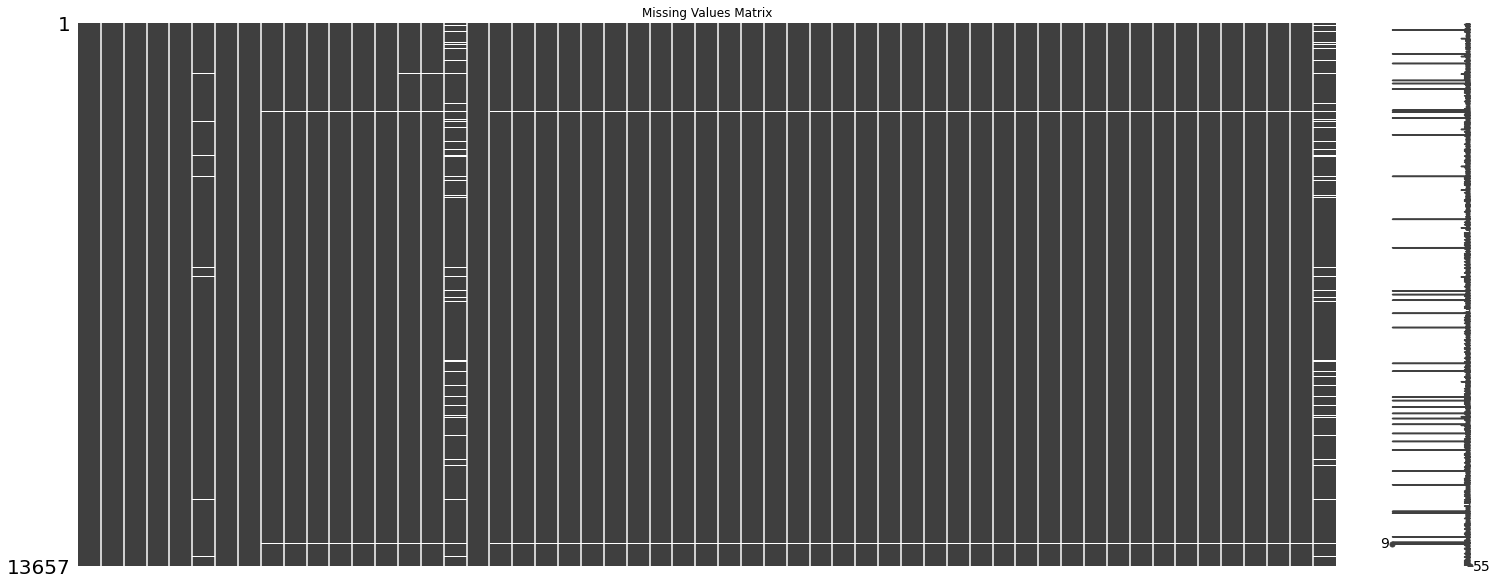

In [42]:
from missingno import matrix
matrix(df)
plt.title('Missing Values Matrix')
plt.show()

!pip install missingno

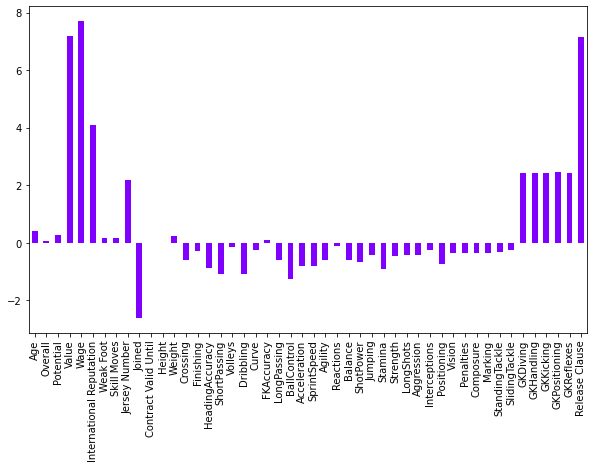

In [43]:
# checking skewness 
plt.figure(figsize=(10,6))
df.skew().plot(kind='bar', cmap='rainbow')
plt.show()
# potentail, value,wage, skill moves and release clause are highly positively skewed. 
# while contract valid until is highly negatively skewed. 


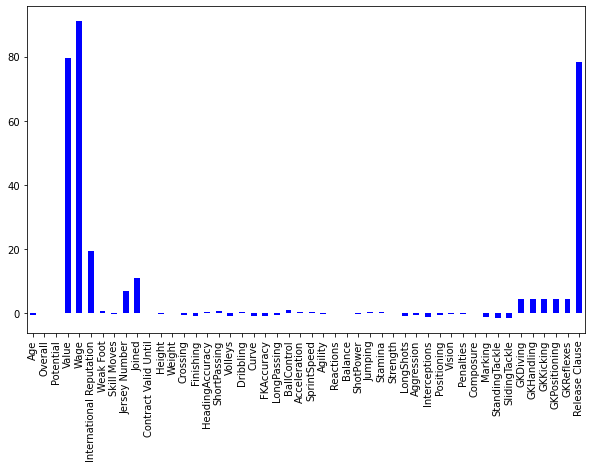

In [44]:
# pplotting kurtosis of all the attributes of the given dataframe.
plt.figure(figsize=(10,6))
df.kurt().plot(kind='bar', cmap='winter')
plt.show()

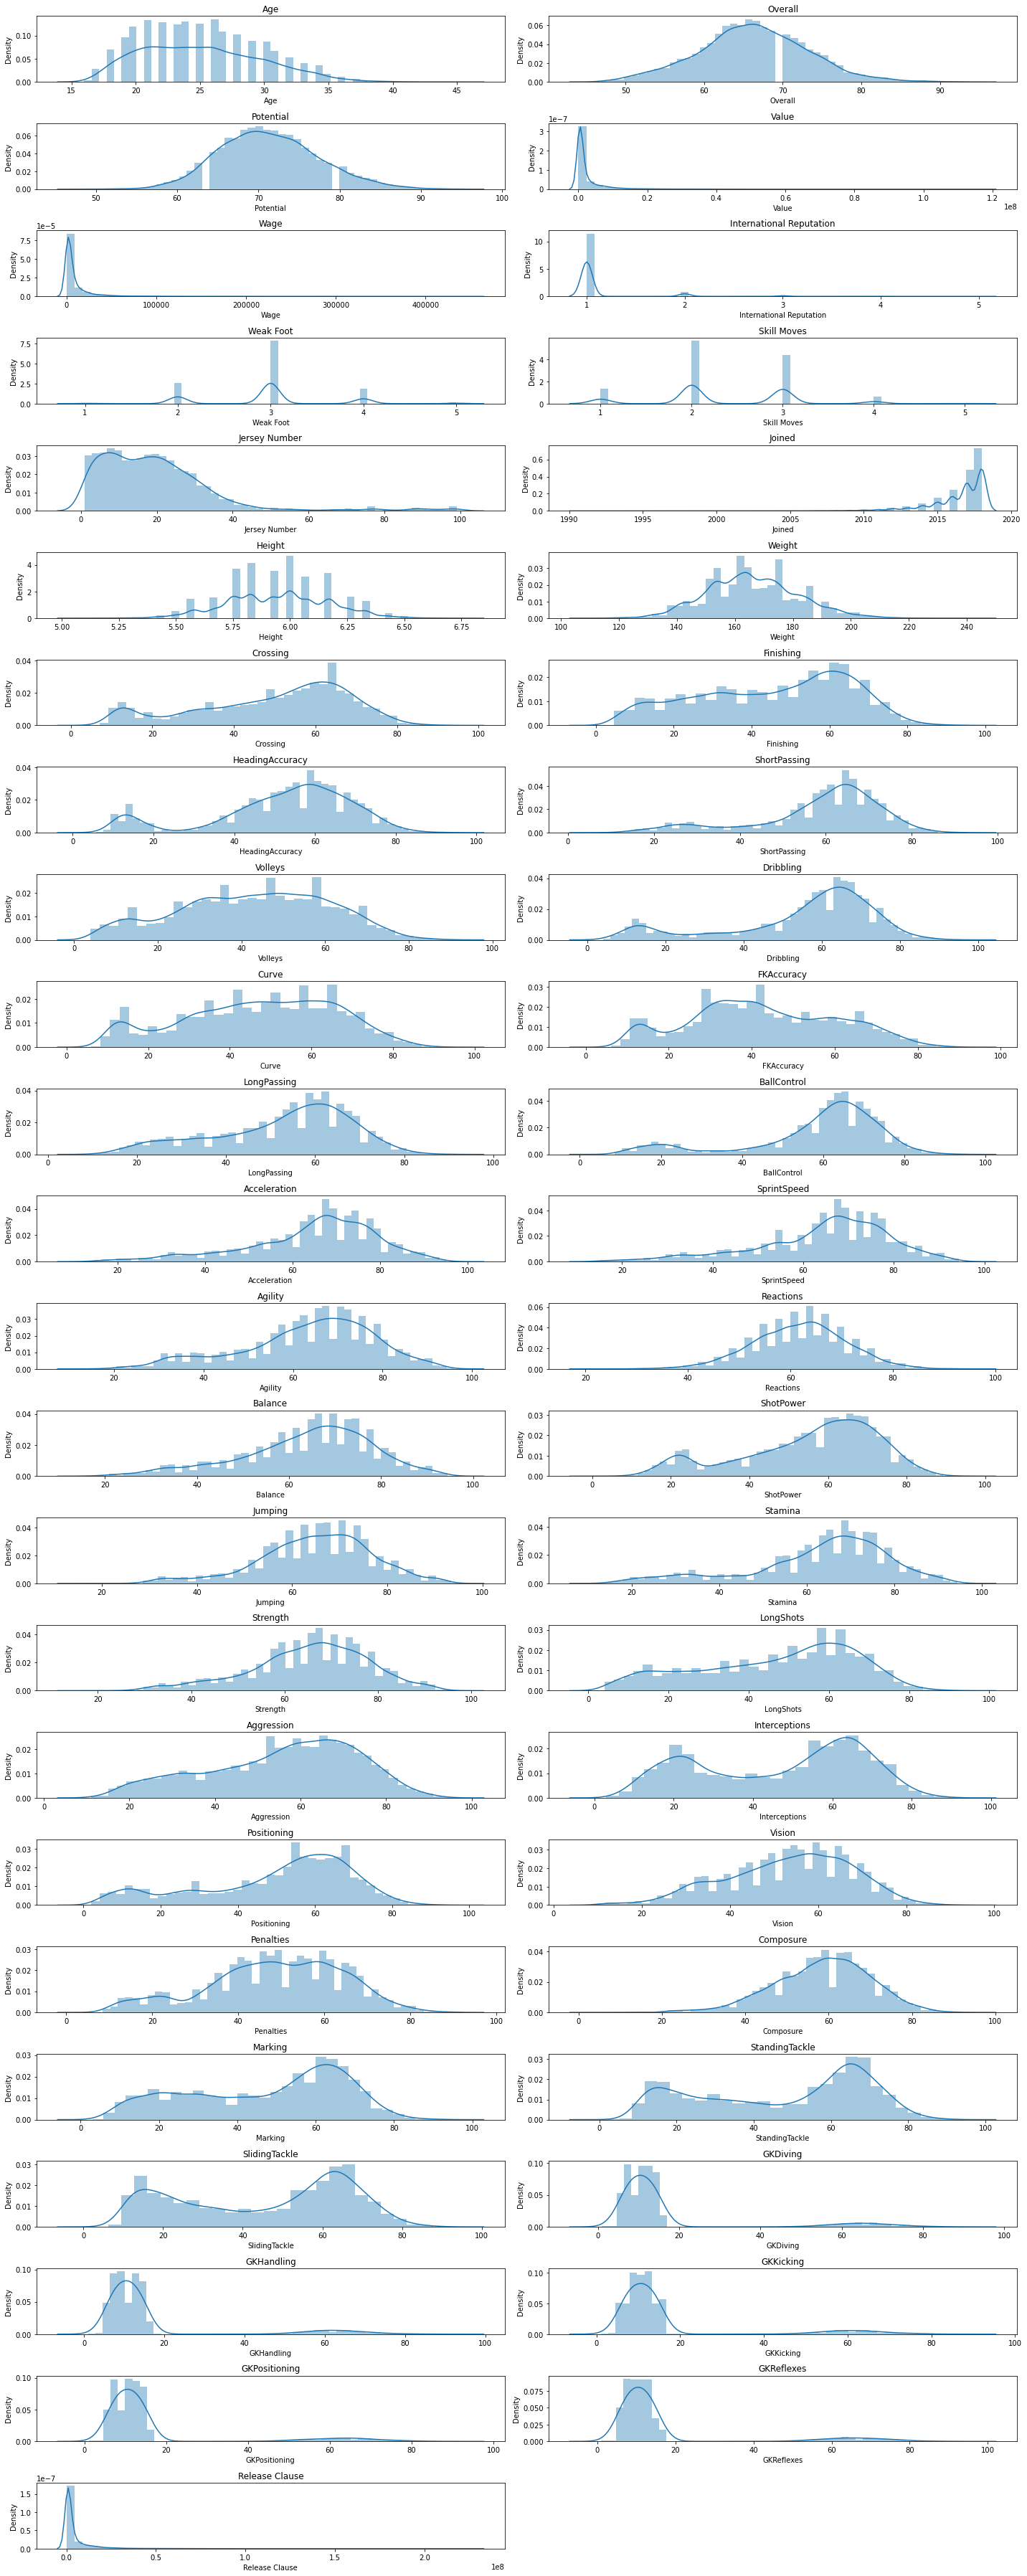

In [45]:
nrows=24
ncols=2
repeater=1

plt.figure(figsize=(20,50))

for i in num_vars:
    plt.subplot(nrows,ncols,repeater)
    repeater+=1
    plt.title(i)
    sns.distplot(df[i])
                 
plt.tight_layout()
plt.show()

In [46]:
df.skew()

Age                         0.392436
Overall                     0.070052
Potential                   0.261056
Value                       7.171178
Wage                        7.700104
International Reputation    4.104687
Weak Foot                   0.150179
Skill Moves                 0.153986
Jersey Number               2.172181
Joined                     -2.606695
Contract Valid Until             NaN
Height                     -0.005657
Weight                      0.227965
Crossing                   -0.597281
Finishing                  -0.301675
HeadingAccuracy            -0.876512
ShortPassing               -1.093215
Volleys                    -0.150753
Dribbling                  -1.078998
Curve                      -0.241851
FKAccuracy                  0.108023
LongPassing                -0.595228
BallControl                -1.264908
Acceleration               -0.818722
SprintSpeed                -0.817550
Agility                    -0.589611
Reactions                  -0.121702
B

### Club

In [47]:
df.Club.isnull().sum()*100/len(df.Club)

1.354616680090796

In [48]:
# Null values of Club column
df['Club'].fillna("Free Agents", inplace = True)

### General Position

In [49]:
df['Position'].unique()

array(['LS', 'CM', 'GK', 'CAM', 'ST', 'RCB', 'RCM', 'CB', 'RB', 'RM',
       'CDM', 'LCM', 'LM', 'RW', 'LB', 'LCB', 'RWB', 'LW', 'RS', 'RDM',
       'LDM', nan, 'CF', 'RF', 'LF', 'LAM', 'RAM', 'LWB'], dtype=object)

In [50]:
def gen_pos(val):
    if val =='GK':
        return 'Goalkeeper'
    elif val == 'LCB' or val == 'CB' or val == 'RCB' or val == 'LB' or val == 'RB' or val=='LWB' or val=='RWB':
        return 'Defender'
    elif val =='CDM' or val =='LDM' or val =='RDM':
        return 'Defensive Midfielder'
    elif val=='LCM' or val=='RCM' or val=='CM' or val=='CAM' or val=='LAM'or val=='RAM' or val=='LM' or val=='RM':
        return 'Midfielder'
    elif val=='CF' or val=='ST' or val=='LW' or val=='RW' or val=='LS' or val =='RS' or val=='LF' or val=='RF':
        return 'Forward'
    
df['General Position'] = df['Position'].apply(gen_pos)

In [51]:
df['General Position'].unique()

array(['Forward', 'Midfielder', 'Goalkeeper', 'Defender',
       'Defensive Midfielder', None], dtype=object)

### Preffered Foot

In [52]:
# Preferred Foot
print(df['Preferred Foot'].unique())
df['Preferred Foot'].value_counts()

['Right' 'Left' nan]


Right    10447
Left      3174
Name: Preferred Foot, dtype: int64

In [53]:
df['Preferred Foot'].isnull().sum()

36

Since there are far more number of right footed players than left footed players, we will go by probability and replace NaN values with Right

In [54]:
df['Preferred Foot'].fillna("Right", inplace = True)

In [55]:
df.isnull().sum()[df.isnull().sum()!=0]

International Reputation      36
Weak Foot                     36
Skill Moves                   36
Work Rate                     36
Body Type                     36
Position                      47
Jersey Number                 47
Joined                      1164
Height                        36
Weight                        36
Crossing                      36
Finishing                     36
HeadingAccuracy               36
ShortPassing                  36
Volleys                       36
Dribbling                     36
Curve                         36
FKAccuracy                    36
LongPassing                   36
BallControl                   36
Acceleration                  36
SprintSpeed                   36
Agility                       36
Reactions                     36
Balance                       36
ShotPower                     36
Jumping                       36
Stamina                       36
Strength                      36
LongShots                     36
Aggression

### International Reputation

In [56]:
df["International Reputation"].unique()

array([ 1.,  2.,  3., nan,  4.,  5.])

In [57]:
df["International Reputation"].isnull().sum()

36

In [58]:
# Grouping players' International Reputation and Weak Foot by their Overall

gpby_repu_wfoot = pd.DataFrame(df[['International Reputation', 'Weak Foot', 'Overall']].groupby('Overall').median().round())
gpby_repu_wfoot

International Reputation  Weak Foot
Overall                                     
46                            1.0        3.0
47                            1.0        3.0
48                            1.0        3.0
49                            1.0        3.0
50                            1.0        3.0
51                            1.0        3.0
52                            1.0        3.0
53                            1.0        3.0
54                            1.0        3.0
55                            1.0        3.0
56                            1.0        3.0
57                            1.0        3.0
58                            1.0        3.0
59                            1.0        3.0
60                            1.0        3.0
61                            1.0        3.0
62                            1.0        3.0
63                            1.0        3.0
64                            1.0        3.0
65                            1.0        3.0
66                            1.0        3.0
67                            1.0        3.0
68                            1.0        3.0
69                            1.0        3.0
70                            1.0        3.0
71                            1.0        3.0
72                            1.0        3.0
73                            1.0        3.0
74                            1.0        3.0
75                            1.0        3.0
76                            1.0        3.0
77                            2.0        3.0
78                            2.0        3.0
79                            2.0        3.0
80                            2.0        3.0
81                            2.0        4.0
82                            2.0        3.0
83                            2.0        3.0
84                            3.0        3.0
85                            3.0        4.0
86                            3.0        3.0
87                            3.0        3.0
88                            3.0        3.0
89                            4.0        3.0
90                            3.0        3.0
91                            4.0        4.0
92                            5.0        5.0
94                            5.0        4.0

In [59]:
df['International Reputation'].fillna(0, inplace=True)

In [60]:
# Replacing the International Reputation of these players with the grouped by average of the International Reputation 
df['International Reputation'] = df.apply(lambda row: gpby_repu_wfoot.loc[row['Overall']]['International Reputation'] if row['International Reputation'] == 0 else row['International Reputation'], axis=1)

In [61]:
# Checking to see if any Null Values exist in the International Reputation column
df["International Reputation"].unique()

array([1., 2., 3., 4., 5.])

In [62]:
### Weak foot

In [63]:
df['Weak Foot'].fillna(0, inplace=True)

In [64]:
# Replacing the Weak Foot of these players with the grouped by average of their Weak Foot based on the Key : Overall 
df['Weak Foot'] = df.apply(lambda row: gpby_repu_wfoot.loc[row['Overall']]['Weak Foot'] if row['Weak Foot'] == 0 else row['Weak Foot'], axis =1  )

In [65]:
# Checking to see if any Null Values exist in Weak Foot column

print(df['Weak Foot'].isnull().sum())
print(df['Weak Foot'].unique())

0
[3. 4. 2. 5. 1.]


### Position

In [66]:
df.Position.isnull().sum()

47

In [67]:
# Filling the NaNs in the Position column with 'No position' in order 
# to facilitate group by in the next step
df['Position'].fillna('No Position', inplace=True)

In [68]:
# Grouping the Skill Columns by Overall and then Position

groupby_overall_positon = pd.DataFrame(df[['Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes','Overall', 'Position']].groupby(['Overall', 'Position']).mean().round())
 

In [69]:
# Grouping the Skill Columns by Overall
groupby_overall = pd.DataFrame(df[['Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes','Overall', 'Position']].groupby(['Overall']).mean().round())

In [70]:
groupby_overall_positon

Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  \
Overall Position                                                                
46      CM            41.0       34.0             46.0          48.0     30.0   
47      CM            37.0       36.0             39.0          51.0     32.0   
        LB            47.0       26.0             39.0          39.0     27.0   
        RB            29.0       24.0             42.0          26.0     27.0   
        RW            44.0       50.0             39.0          42.0     40.0   
...                    ...        ...              ...           ...      ...   
91      RCB           66.0       60.0             91.0          78.0     66.0   
        RCM           90.0       77.0             55.0          92.0     79.0   
        RS            77.0       93.0             77.0          82.0     88.0   
92      LW            79.0       87.0             62.0          84.0     84.0   
94      ST            84.0       94.0             89.0          81.0     87.0   

                  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  ...  \
Overall Position                                                          ...   
46      CM             43.0   40.0        34.0         44.0         51.0  ...   
47      CM             47.0   38.0        36.0         49.0         48.0  ...   
        LB             45.0   29.0        21.0         41.0         41.0  ...   
        RB             34.0   26.0        26.0         25.0         30.0  ...   
        RW             51.0   34.0        32.0         32.0         52.0  ...   
...                     ...    ...         ...          ...          ...  ...   
91      RCB            63.0   74.0        72.0         77.0         84.0  ...   
        RCM            88.0   85.0        80.0         90.0         92.0  ...   
        RS             87.0   86.0        84.0         64.0         90.0  ...   
92      LW             96.0   88.0        87.0         78.0         95.0  ...   
94      ST             88.0   81.0        76.0         77.0         94.0  ...   

                  Penalties  Composure  Marking  StandingTackle  \
Overall Position                                                  
46      CM             33.0       43.0     40.0            43.0   
47      CM             41.0       44.0     43.0            45.0   
        LB             29.0       36.0     45.0            42.0   
        RB             35.0       38.0     42.0            48.0   
        RW             50.0       46.0     20.0            25.0   
...                     ...        ...      ...             ...   
91      RCB            75.0       82.0     87.0            92.0   
        RCM            80.0       86.0     64.0            67.0   
        RS             85.0       85.0     62.0            45.0   
92      LW             81.0       94.0     27.0            24.0   
94      ST             85.0       95.0     28.0            31.0   

                  SlidingTackle  GKDiving  GKHandling  GKKicking  \
Overall Position                                                   
46      CM                 50.0      10.0        15.0        9.0   
47      CM                 45.0      10.0         9.0        9.0   
        LB                 46.0      15.0        13.0        6.0   
        RB                 50.0       8.0        10.0        8.0   
        RW                 27.0      14.0         6.0       14.0   
...                         ...       ...         ...        ...   
91      RCB                91.0      11.0         8.0        9.0   
        RCM                62.0      14.0        11.0        6.0   
        RS                 38.0      27.0        25.0       31.0   
92      LW                 33.0       9.0         9.0       15.0   
94      ST                 23.0       7.0        11.0       15.0   

                  GKPositioning  GKReflexes  
Overall Position                             
46      CM                 12.0         9.0  
47      CM     

In [71]:
skill_cols = ['Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

In [72]:
# Replacing the NaNs with 0 to make things easy 

for col in skill_cols:
    df[col].fillna(0, inplace=True)

In [73]:
# before actually replacing all skill columns using the group by table we must accomodate for the instances where positions is 'No position' 
# in such cases we will use just the median for Overall  

for i in range(df['Overall'].min(),df['Overall'].max() + 1):
    try:
        groupby_overall_positon.loc[i, 'No Position'] = groupby_overall_positon.loc[i].median().round()    
    except:
        []

In [74]:
groupby_overall_positon

Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  \
Overall Position                                                                
46      CM            41.0       34.0             46.0          48.0     30.0   
47      CM            37.0       36.0             39.0          51.0     32.0   
        LB            47.0       26.0             39.0          39.0     27.0   
        RB            29.0       24.0             42.0          26.0     27.0   
        RW            44.0       50.0             39.0          42.0     40.0   
...                    ...        ...              ...           ...      ...   
91      RCB           66.0       60.0             91.0          78.0     66.0   
        RCM           90.0       77.0             55.0          92.0     79.0   
        RS            77.0       93.0             77.0          82.0     88.0   
92      LW            79.0       87.0             62.0          84.0     84.0   
94      ST            84.0       94.0             89.0          81.0     87.0   

                  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  ...  \
Overall Position                                                          ...   
46      CM             43.0   40.0        34.0         44.0         51.0  ...   
47      CM             47.0   38.0        36.0         49.0         48.0  ...   
        LB             45.0   29.0        21.0         41.0         41.0  ...   
        RB             34.0   26.0        26.0         25.0         30.0  ...   
        RW             51.0   34.0        32.0         32.0         52.0  ...   
...                     ...    ...         ...          ...          ...  ...   
91      RCB            63.0   74.0        72.0         77.0         84.0  ...   
        RCM            88.0   85.0        80.0         90.0         92.0  ...   
        RS             87.0   86.0        84.0         64.0         90.0  ...   
92      LW             96.0   88.0        87.0         78.0         95.0  ...   
94      ST             88.0   81.0        76.0         77.0         94.0  ...   

                  Composure  Marking  StandingTackle  SlidingTackle  GKDiving  \
Overall Position                                                                
46      CM             43.0     40.0            43.0           50.0      10.0   
47      CM             44.0     43.0            45.0           45.0      10.0   
        LB             36.0     45.0            42.0           46.0      15.0   
        RB             38.0     42.0            48.0           50.0       8.0   
        RW             46.0     20.0            25.0           27.0      14.0   
...                     ...      ...             ...            ...       ...   
91      RCB            82.0     87.0            92.0           91.0      11.0   
        RCM            86.0     64.0            67.0           62.0      14.0   
        RS             85.0     62.0            45.0           38.0      27.0   
92      LW             94.0     27.0            24.0           33.0       9.0   
94      ST             95.0     28.0            31.0           23.0       7.0   

                  GKHandling  GKKicking  GKPositioning  GKReflexes  \
Overall Position                                                     
46      CM              15.0        9.0           12.0         9.0   
47      CM               9.0        9.0           10.0        11.0   
        LB              13.0        6.0           14.0        12.0   
        RB              10.0        8.0           12.0        12.0   
        RW               6.0       14.0            8.0         9.0   
...                      ...        ...            ...         ...   
91      RCB              8.0        9.0            7.0        11.0   
        RCM             11.0        6.0           12.0        11.0   
        RS              25.0       31.0           33.0        37.0   
92      LW               9.0       15.0           15.0        11.0   
94      ST      

In [75]:
# Finally replacing the NaNs in the skill columns by the average rating of their Overall and Position by referring the group by table
for col in skill_cols:
    df[col] = df.apply(lambda row: groupby_overall_positon.loc[row['Overall'],row['Position']][col] if row[col] == 0 else row[col], axis = 1  )

In [76]:
df[df['Crossing']==0]

Empty DataFrame
Columns: [Name, Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Body Type, Position, Jersey Number, Joined, Contract Valid Until, Height, Weight, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Release Clause, General Position]
Index: []

[0 rows x 56 columns]

### Position
Instead of replacing the Position with the most common predictions, we will try to guess the position of the player based on the rest of the ratings

In [77]:
df['Position'].unique()

array(['LS', 'CM', 'GK', 'CAM', 'ST', 'RCB', 'RCM', 'CB', 'RB', 'RM',
       'CDM', 'LCM', 'LM', 'RW', 'LB', 'LCB', 'RWB', 'LW', 'RS', 'RDM',
       'LDM', 'No Position', 'CF', 'RF', 'LF', 'LAM', 'RAM', 'LWB'],
      dtype=object)

In [78]:
df[df['Position'] == 'No Position']

Name  Age       Nationality  Overall  Potential  \
183      Jang Hyun Soo   25    Korea Republic       62         65   
404         E. Lyngdoh   31             India       56         56   
796           Vinicius   19            Brazil       62         77   
864            J. Arce   33           Bolivia       68         68   
1044          S. Bauer   25           Austria       62         66   
1320    D. Lalhlimpuia   20             India       54         67   
1493       E. González   23         Venezuela       62         70   
1574         R. Deacon   26           England       62         62   
1723     H. Al Mansour   25      Saudi Arabia       62         64   
2310        I. Sissoko   22            France       62         68   
2362        O. Marrufo   25            Mexico       62         65   
2537         S. Rivera   26          Colombia       62         64   
2867   L. Lalruatthara   23             India       57         63   
3034        M. Chergui   29            France       62         62   
3980          J. Singh   26             India       55         58   
4281        M. Al Amri   26      Saudi Arabia       62         63   
4721         R. Vargas   23           Bolivia       66         69   
5717         G. Miller   31          Scotland       62         62   
6043      L. Gutiérrez   33           Bolivia       67         67   
6757      K. Dankowski   21            Poland       62         72   
7858          C. Singh   21             India       53         62   
8405         F. Garcia   29          Paraguay       62         62   
8538         E. Binaku   22           Albania       62         70   
8761       A. Semprini   20             Italy       62         72   
9314       Han Pengfei   25          China PR       62         66   
9934       A. Al Malki   23      Saudi Arabia       62         67   
11570     F. Sepúlveda   26             Chile       62         63   
11929       B. Lepistu   25           Estonia       62         67   
12460        R. Raldes   37           Bolivia       70         70   
13241   Jwa Joon Hyeop   27    Korea Republic       62         62   
13414        Li Yunqiu   27          China PR       62         62   
13769     R. Haemhouts   34           Belgium       62         62   
14108       D. Gardner   28           England       62         62   
14305          S. Paul   31             India       57         57   
14409        M. Feeney   19           England       62         78   
14715         R. Minor   30           Denmark       62         62   
14773      D. Bejarano   26           Bolivia       65         66   
15245        Y. Ammour   19            France       62         77   
15739         L. Sowah   25           Germany       62         65   
16204         J. Stead   35           England       62         62   
17605       L. Garguła   37            Poland       62         62   
18537       J. McNulty   33          Scotland       62         62   
20480      A. Abruscia   27             Italy       62         62   
20614     L. Bengtsson   20            Sweden       62         73   
22573    L. McCullough   24  Northern Ireland       62         69   
23118      E. Guerrero   27             Chile       62         65   
23273       A. Aidonis   17           Germany       62         82   

                                Club     Value    Wage Preferred Foot  \
183          Suwon Samsung Bluewings  375000.0  2000.0          Right   
404                      Free Agents       0.0     0.0          Right   
796                          Bologna  525000.0  1000.0          Right   
864                      Free Agents       0.0     0.0           Left   
1044        FC Admira Wacker Mödling  325000.0  2000.0          Right   
1320                     Free Agents       0.0     0.0          Right   
1493                 Boyacá Chicó FC  375000.0  1000.0          Right   
1574                       Dundee FC  325000.0  1000.0          Right   
1723                        Al Nassr  300000.0  

4 major categories :

* Defensive Attributes
* Midfield Attributes
* Striker Attributes
* GoalKeeper Attributes


For Defensive Score, the attributes chosen are:

* Marking
* Standing Tackle
* Sliding Tackle
* Heading Accuracy
* Interceptions

For Midfield Score, the attributes chosen are:

* Short Passing
* Long Passing
* Dribbling
* Curve
* Ball Control
* Crossing
* Vision

For Striker Score, the attributes chosen are:

* Volleys
* Finishing
* Positioning
* Compure

For Goalkeeper Score, the attributes chosen are:

* GKDiving
* GKReflexes
* GKPositioning
* GKKicking
* GKHandling

In [79]:
# Calculating average position wise Attributes to determine the position of the player

df['defensive_score'] = round((df['Marking'] + df['StandingTackle'] + df['SlidingTackle'] + df['HeadingAccuracy'] + df['Interceptions'])/5)

df['midfield_score'] = round((df['ShortPassing'] + df['Dribbling'] + df['Curve'] + df['LongPassing'] + df['BallControl'] + df['Crossing'] + df['Vision'])/7)

df['striker_score'] = round((df['Volleys'] + df['Finishing'] + df['Positioning'] + df['Composure']) / 4)

df['goalkeeper_score']= round((df['GKDiving'] + df['GKHandling'] + df['GKKicking'] + df['GKPositioning'] + df['GKReflexes']) / 5)


# Referenced from Sofifa : https://sofifa.com/

df['Movement_Attributes'] = round((df['Acceleration'] + df['SprintSpeed'] + df['Reactions'] + df['Balance'] + df['Agility']) / 5)

df['Power_Attributes'] = round((df['Strength'] + df['Jumping'] + df['ShotPower'] + df['Stamina'] + df['LongShots']) / 5)

df['Mentality_Attributes'] = round((df['Aggression'] + df['Interceptions'] + df['Vision'] + df['Positioning'] + df['Penalties'] + df['Composure']) / 6)

df['Skill_Attributes'] =  round((df['Dribbling'] + df['Curve'] + df['FKAccuracy'] + df['LongPassing'] + df['BallControl']) / 5)


In [80]:
# Defining a function that would return the position based on the 4 scores defined

def define_position(row):
    max_attr = max(row['defensive_score'], row['midfield_score'], row['striker_score'], row['goalkeeper_score'])
    if max_attr == row['goalkeeper_score']:
        return 'GK'
    elif max_attr == row['defensive_score']:
        return 'CB'
    elif max_attr == row['midfield_score']:
        return 'CM'
    elif max_attr == row['striker_score']:
        return 'CF' 

In [81]:
# Applying the function
df['Position'] = df.apply(lambda row: define_position(row) if row['Position']=='No Position' else row['Position'], axis = 1)

In [82]:
# Checking to see if the Position column has been cleaned
df['Position'].isnull().sum()

0

### Skill Moves
We will clean the Skill Moves column in a similar manner to the International Reputation column except instead of using Overall, we will use Position as the metric of grouping

In [83]:
# Grouping the Skill Moves based on the position
grpby_skill_moves = df[['Skill Moves', 'Position']].groupby('Position').mean().round()

In [84]:
# Replacing NaNs with 0 for ease of replacement

df['Skill Moves'].fillna(0, inplace=True)

In [85]:
grpby_skill_moves

Skill Moves
Position             
CAM               3.0
CB                2.0
CDM               2.0
CF                3.0
CM                3.0
GK                1.0
LAM               3.0
LB                2.0
LCB               2.0
LCM               3.0
LDM               3.0
LF                3.0
LM                3.0
LS                3.0
LW                3.0
LWB               3.0
RAM               3.0
RB                2.0
RCB               2.0
RCM               3.0
RDM               3.0
RF                3.0
RM                3.0
RS                3.0
RW                3.0
RWB               2.0
ST                3.0

In [86]:
# Replacing the skill moves with the group by average
df['Skill Moves'] = df.apply(lambda row: grpby_skill_moves.loc[row['Position']]['Skill Moves'] if row['Skill Moves'] == 0 else row['Skill Moves'], axis =1)

In [87]:
df["Skill Moves"].isnull().sum()

0

In [88]:
df.isnull().sum()[df.isnull().sum()!=0]

Work Rate             36
Body Type             36
Jersey Number         47
Joined              1164
Height                36
Weight                36
Release Clause      1171
General Position      47
dtype: int64

### Work Rate

In [89]:
df['Work Rate'].value_counts()

Medium/ Medium    7353
High/ Medium      2365
Medium/ High      1276
High/ High         769
Medium/ Low        630
High/ Low          524
Low/ Medium        338
Low/ High          337
Low/ Low            29
Name: Work Rate, dtype: int64

In [90]:
df["Work Rate"].mode()

0    Medium/ Medium
dtype: object

In [91]:
df['Work Rate'].fillna(df["Work Rate"].mode()[0],inplace=True)

### Body Type

In [92]:
df['Body Type'].unique()

array(['Lean', 'Normal', 'Stocky', nan, 'Shaqiri', 'C. Ronaldo', 'Neymar',
       'PLAYER_BODY_TYPE_25', 'Akinfenwa', 'Courtois'], dtype=object)

In [93]:
df['Body Type'].value_counts()

Normal                 7942
Lean                   4825
Stocky                  848
Shaqiri                   1
C. Ronaldo                1
Neymar                    1
PLAYER_BODY_TYPE_25       1
Akinfenwa                 1
Courtois                  1
Name: Body Type, dtype: int64

In [94]:
# Seperating the Unique body types in a separate category : Unique

df['Body Type'][df['Body Type'] == "Shaqiri"] = "Unique"
df['Body Type'][df['Body Type'] == "C. Ronaldo"] = "Unique"
df['Body Type'][df['Body Type'] == "Neymar"] = "Unique"
df['Body Type'][df['Body Type'] == "PLAYER_BODY_TYPE_25"] = "Unique"
df['Body Type'][df['Body Type'] == "Akinfenwa"] = "Unique"
df['Body Type'][df['Body Type'] == "Courtois"] = "Unique"


In [95]:
# Replacing the NaNs with the most frequent occurence i.e. 'Normal'

df['Body Type'].fillna('Normal', inplace=True)

In [96]:
df['Body Type'].unique()

array(['Lean', 'Normal', 'Stocky', 'Unique'], dtype=object)

In [97]:
df.isnull().sum()[df.isnull().sum()!=0]

Jersey Number         47
Joined              1164
Height                36
Weight                36
Release Clause      1171
General Position      47
dtype: int64

### Contract Valid until

In [98]:
df["Contract Valid Until"].unique()

array(['2019', '2022', '2018', '2020', '2021', '2024', '2023', 'nan',
       '2026', '2025'], dtype=object)

In [99]:
df[df["Contract Valid Until"]=="nan"]

Name  Age     Nationality  Overall  Potential  \
47          M. Smith   18           Wales       56         75   
170    A. Edathodika   31           India       62         62   
183    Jang Hyun Soo   25  Korea Republic       62         65   
228    M. El-Shenawy   29           Egypt       66         68   
404       E. Lyngdoh   31           India       56         56   
...              ...  ...             ...      ...        ...   
24912     M. Rafique   25           India       58         61   
25015       T. Payne   24     New Zealand       62         66   
25121       A. Thapa   20           India       59         71   
25221      S. Ekramy   34           Egypt       69         69   
25366        A. Lang   25         Hungary       69         71   

                          Club     Value    Wage Preferred Foot  \
47                 Free Agents       0.0     0.0          Right   
170                Free Agents       0.0     0.0           Left   
183    Suwon Samsung Bluewings  375000.0  2000.0          Right   
228                Free Agents       0.0     0.0          Right   
404                Free Agents       0.0     0.0          Right   
...                        ...       ...     ...            ...   
24912              Free Agents       0.0     0.0          Right   
25015              Free Agents       0.0     0.0          Right   
25121              Free Agents       0.0     0.0          Right   
25221              Free Agents       0.0     0.0          Right   
25366              Free Agents       0.0     0.0          Right   

       International Reputation  ...  Release Clause      General Position  \
47                          1.0  ...             NaN  Defensive Midfielder   
170                         1.0  ...             NaN              Defender   
183                         1.0  ...             NaN                  None   
228                         1.0  ...             NaN            Goalkeeper   
404                         1.0  ...             NaN                  None   
...                         ...  ...             ...                   ...   
24912                       1.0  ...             NaN            Midfielder   
25015                       1.0  ...             NaN            Midfielder   
25121                       1.0  ...             NaN            Midfielder   
25221                       1.0  ...             NaN            Goalkeeper   
25366                       1.0  ...             NaN              Defender   

      defensive_score midfield_score striker_score  goalkeeper_score  \
47               50.0           52.0          44.0              11.0   
170              64.0           35.0          34.0              12.0   
183              54.0           55.0          49.0              10.0   
228              20.0           22.0          21.0              65.0   
404              41.0           58.0          52.0              10.0   
...               ...            ...           ...               ...   
24912            52.0           53.0          47.0              10.0   
25015            57.0           59.0          55.0              10.0   
25121            50.0           57.0          43.0              11.0   
25221            15.0           24.0          23.0              71.0   
25366            70.0           42.0          44.0              11.0   

       Movement_Attributes Power_Attributes  Mentality_Attributes  \
47                    60.0             53.0                  52.0   
170                   60.0             51.0                  44.0   
183                   66.0             61.0                  52.0   
228                   50.0             38.0                  25.0   
404                   71.0             58.0                  49.0   
...                    ...              ...                   ...   
24912                 71.0             53.0                  49.0   
25015                 66.0             64.0                  60.0   
25121  

In [100]:
df["Contract Valid Until"].mode()

0    2019
dtype: object

In [101]:
df["Contract Valid Until"].replace("nan",df["Contract Valid Until"].mode()[0],inplace=True)

In [102]:
df["Contract Valid Until"]=df["Contract Valid Until"].astype("int")

In [103]:
df["Contract Valid Until"].unique()

array([2019, 2022, 2018, 2020, 2021, 2024, 2023, 2026, 2025])

In [104]:
df.isnull().sum()[df.isnull().sum()!=0]

Jersey Number         47
Joined              1164
Height                36
Weight                36
Release Clause      1171
General Position      47
dtype: int64

In [105]:
# Droping the Jersey Number not useful for exploration
df.drop("Jersey Number",axis=1,inplace=True)

### Joined

In [106]:
df[df.Joined.isna()]

Name  Age          Nationality  Overall  Potential  \
34      C. Beauvue   30               France       75         75   
39        P. Rubio   29                Chile       72         72   
41     J. Barjonas   19             Scotland       57         75   
47        M. Smith   18                Wales       56         75   
52      C. Maycock   20              England       58         68   
...            ...  ...                  ...      ...        ...   
25281    T. Sekine   23                Japan       67         72   
25325  L. Mosevich   21            Argentina       61         73   
25335     T. Moore   21              England       63         72   
25366      A. Lang   25              Hungary       69         71   
25415  P. O'Connor   20  Republic of Ireland       61         72   

                             Club      Value     Wage Preferred Foot  \
34            Stade Malherbe Caen  6500000.0  23000.0          Right   
39     CD Everton de Viña del Mar  3100000.0  10000.0          Right   
41                           Bury   220000.0   3000.0          Right   
47                    Free Agents        0.0      0.0          Right   
52              Macclesfield Town   180000.0   1000.0          Right   
...                           ...        ...      ...            ...   
25281           Sint-Truidense VV  1000000.0   8000.0          Right   
25325               FC St. Gallen   400000.0   2000.0          Right   
25335             Southend United   500000.0   5000.0          Right   
25366                 Free Agents        0.0      0.0          Right   
25415                   Blackpool   375000.0   5000.0          Right   

       International Reputation  ...  Release Clause      General Position  \
34                          1.0  ...             NaN               Forward   
39                          1.0  ...             NaN               Forward   
41                          1.0  ...             NaN            Midfielder   
47                          1.0  ...             NaN  Defensive Midfielder   
52                          1.0  ...             NaN  Defensive Midfielder   
...                         ...  ...             ...                   ...   
25281                       1.0  ...             NaN            Midfielder   
25325                       1.0  ...             NaN              Defender   
25335                       1.0  ...             NaN              Defender   
25366                       1.0  ...             NaN              Defender   
25415                       1.0  ...             NaN              Defender   

      defensive_score midfield_score striker_score  goalkeeper_score  \
34               44.0           69.0          72.0              13.0   
39               32.0           62.0          70.0              11.0   
41               49.0           56.0          38.0              10.0   
47               50.0           52.0          44.0              11.0   
52               51.0           50.0          43.0              11.0   
...               ...            ...           ...               ...   
25281            31.0           60.0          58.0               9.0   
25325            59.0           33.0          30.0              10.0   
25335            60.0           56.0          40.0               8.0   
25366            70.0           42.0          44.0              11.0   
25415            60.0           35.0          29.0              13.0   

       Movement_Attributes  Power_Attributes  Mentality_Attributes  \
34                    70.0              66.0                  60.0   
39                    72.0              74.0                  58.0   
41                    66.0              52.0                  50.0   
47                    60.0              53.0                  52.0   
52                    60.0              55.0                  49.0   
...                    ...               ...                   ...   
25281                 79.0              

In [107]:
df.Joined.fillna(0,axis=0).value_counts()

2018.0    4934
2017.0    3240
2016.0    1663
0.0       1164
2015.0    1013
2014.0     607
2013.0     344
2012.0     259
2011.0     151
2010.0      96
2009.0      55
2008.0      41
2007.0      28
2005.0      14
2006.0      12
2003.0      11
2004.0       9
2002.0       7
1998.0       3
2001.0       2
2000.0       2
1991.0       1
1999.0       1
Name: Joined, dtype: int64

In [108]:
df.Joined.fillna(0,axis=0,inplace=True)

In [109]:
df.isnull().sum()[df.isnull().sum()!=0]

Height                36
Weight                36
Release Clause      1171
General Position      47
dtype: int64

### Height

In [110]:
df['Height'].isnull().sum()

36

In [111]:
df[['Height', 'Weight']][df['Height'].isna()]

Height  Weight
183       NaN     NaN
796       NaN     NaN
1044      NaN     NaN
1493      NaN     NaN
1574      NaN     NaN
1723      NaN     NaN
2310      NaN     NaN
2362      NaN     NaN
2537      NaN     NaN
3034      NaN     NaN
4281      NaN     NaN
5717      NaN     NaN
6757      NaN     NaN
8405      NaN     NaN
8538      NaN     NaN
8761      NaN     NaN
9314      NaN     NaN
9934      NaN     NaN
11570     NaN     NaN
11929     NaN     NaN
13241     NaN     NaN
13414     NaN     NaN
13769     NaN     NaN
14108     NaN     NaN
14409     NaN     NaN
14715     NaN     NaN
15245     NaN     NaN
15739     NaN     NaN
16204     NaN     NaN
17605     NaN     NaN
18537     NaN     NaN
20480     NaN     NaN
20614     NaN     NaN
22573     NaN     NaN
23118     NaN     NaN
23273     NaN     NaN

In [112]:
groupby_nation_position = pd.DataFrame(df[['Height', 'Nationality','Position']].groupby(['Nationality', 'Position']).mean())
groupby_nation_position

Height
Nationality Position          
Afghanistan CAM       5.670000
            LB        5.750000
Albania     CAM       5.833333
            CB        6.110000
            CDM       6.330000
...                        ...
Zimbabwe    LB        5.875000
            LCM       5.750000
            RB        6.170000
            RCM       5.830000
            ST        5.890000

[1645 rows x 1 columns]

In [113]:
# Replacing the NaN values in the height column using the groupby table
#df["Height"].fillna(lambda row: float(groupby_nation_position.loc[row['Nationality'],row['Position']]['Height']) if row['Height'] == 1 else float(row['Height']), axis=0,inplace=True)

In [114]:
df['Height'].fillna(1, inplace = True)

In [115]:
df['Height'].isna().sum()

0

In [116]:
df['Height'] = df.apply(lambda row: groupby_nation_position.loc[row['Nationality'],row['Position']]['Height'] if row['Height'] == 1 else row['Height'], axis=1)

In [117]:
df[df['Height'] == 1]

Empty DataFrame
Columns: [Name, Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Body Type, Position, Joined, Contract Valid Until, Height, Weight, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Release Clause, General Position, defensive_score, midfield_score, striker_score, goalkeeper_score, Movement_Attributes, Power_Attributes, Mentality_Attributes, Skill_Attributes]
Index: []

[0 rows x 63 columns]

In [118]:
groupby_position_height = pd.DataFrame(df[['Height', 'Position']].groupby([ 'Position']).mean())
df['Position'][df['Height'] == 1]

Series([], Name: Position, dtype: object)

In [119]:
df['Height'] = df.apply(lambda row: groupby_position_height.loc[row['Position']]['Height'] if row['Height'] == 1 else row['Height'], axis=1)

In [120]:
df[df['Height'] == 1]

Empty DataFrame
Columns: [Name, Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Body Type, Position, Joined, Contract Valid Until, Height, Weight, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Release Clause, General Position, defensive_score, midfield_score, striker_score, goalkeeper_score, Movement_Attributes, Power_Attributes, Mentality_Attributes, Skill_Attributes]
Index: []

[0 rows x 63 columns]

### Weight

In [121]:
df["Weight"].isnull().sum()

36

In [122]:
df[['International Reputation','Position', "Nationality", "Height"]][df['Weight'].isna()]

International Reputation Position       Nationality    Height
183                         1.0       CM    Korea Republic  5.856207
796                         1.0       CM            Brazil  5.872353
1044                        1.0       CM           Austria  5.917273
1493                        1.0       CM         Venezuela  5.832000
1574                        1.0       CM           England  5.849108
1723                        1.0       CM      Saudi Arabia  5.737692
2310                        1.0       CM            France  5.902791
2362                        1.0       CM            Mexico  5.711154
2537                        1.0       CM          Colombia  5.855263
3034                        1.0       CM            France  5.902791
4281                        1.0       CM      Saudi Arabia  5.737692
5717                        1.0       CM          Scotland  5.863333
6757                        1.0       CM            Poland  5.883000
8405                        1.0       CM          Paraguay  5.915000
8538                        1.0       CM           Albania  5.917500
8761                        1.0       CM             Italy  5.943529
9314                        1.0       CM          China PR  5.919655
9934                        1.0       CM      Saudi Arabia  5.737692
11570                       1.0       CM             Chile  5.685000
11929                       1.0       CM           Estonia       NaN
13241                       1.0       CM    Korea Republic  5.856207
13414                       1.0       CM          China PR  5.919655
13769                       1.0       CM           Belgium  5.958000
14108                       1.0       CM           England  5.849108
14409                       1.0       CM           England  5.849108
14715                       1.0       CM           Denmark  5.945200
15245                       1.0       CM            France  5.902791
15739                       1.0       CM           Germany  5.916875
16204                       1.0       CM           England  5.849108
17605                       1.0       CM            Poland  5.883000
18537                       1.0       CM          Scotland  5.863333
20480                       1.0       CM             Italy  5.943529
20614                       1.0       CM            Sweden  5.906389
22573                       1.0       CM  Northern Ireland  5.800000
23118                       1.0       CM             Chile  5.685000
23273                       1.0       CM           Germany  5.916875

In [123]:
# creating spearate height column "height_category" to categorize the height of the players

def height_category(val):
    if val >= 5 and val < 5.3:
        return "Category 1"
    elif val >= 5.3 and val < 5.7:
        return "Category 2"    
    elif val >= 5.7 and val < 6:
        return "Category 3"
    elif val >= 6 and val < 6.3:
        return "Category 4"    
    elif val >= 6.3 and val < 6.7:
        return "Category 5"
    else:
        return "Category 6"
    
df['height_category'] = df['Height'].apply(height_category)   

In [124]:
df[['Height','Weight','height_category']].head(2)

Height  Weight height_category
0    6.08   161.0      Category 4
1    6.17   172.0      Category 4

In [125]:
# grouping players based on their height category by taking their average weight

groupby_height_weight = pd.DataFrame(df[['height_category', 'Weight']].groupby(['height_category']).mean())
groupby_height_weight

Weight
height_category            
Category 1       128.187500
Category 2       147.972911
Category 3       159.503471
Category 4       173.877380
Category 5       189.153756
Category 6       225.000000

In [126]:
df[['Height',"Weight"]][df['Weight'].isna()]

Height  Weight
183    5.856207     NaN
796    5.872353     NaN
1044   5.917273     NaN
1493   5.832000     NaN
1574   5.849108     NaN
1723   5.737692     NaN
2310   5.902791     NaN
2362   5.711154     NaN
2537   5.855263     NaN
3034   5.902791     NaN
4281   5.737692     NaN
5717   5.863333     NaN
6757   5.883000     NaN
8405   5.915000     NaN
8538   5.917500     NaN
8761   5.943529     NaN
9314   5.919655     NaN
9934   5.737692     NaN
11570  5.685000     NaN
11929       NaN     NaN
13241  5.856207     NaN
13414  5.919655     NaN
13769  5.958000     NaN
14108  5.849108     NaN
14409  5.849108     NaN
14715  5.945200     NaN
15245  5.902791     NaN
15739  5.916875     NaN
16204  5.849108     NaN
17605  5.883000     NaN
18537  5.863333     NaN
20480  5.943529     NaN
20614  5.906389     NaN
22573  5.800000     NaN
23118  5.685000     NaN
23273  5.916875     NaN

In [127]:
df['Weight'].fillna(1, inplace = True)

In [128]:
df['Weight'] = df.apply(lambda row: groupby_height_weight.loc[row['height_category']]['Weight'] if row['Weight'] == 1 else row['Weight'], axis =1)

In [129]:
df.drop(['height_category'],axis=1, inplace=True)

In [130]:
df[df["Weight"]==1]

Empty DataFrame
Columns: [Name, Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Body Type, Position, Joined, Contract Valid Until, Height, Weight, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Release Clause, General Position, defensive_score, midfield_score, striker_score, goalkeeper_score, Movement_Attributes, Power_Attributes, Mentality_Attributes, Skill_Attributes]
Index: []

[0 rows x 63 columns]

In [131]:
df.isnull().sum()[df.isnull().sum()!=0]

Height                 1
Release Clause      1171
General Position      47
dtype: int64

### Release Clause

In [132]:
df["Release Clause"].unique()

array([ 429000., 1800000., 9600000., ...,  818000.,   84000.,  379000.])

In [133]:
df['Release Clause'].fillna(0, inplace = True) # 0 means no release clause

In [134]:
df["Release Clause"].unique()

array([ 429000., 1800000., 9600000., ...,  818000.,   84000.,  379000.])

### Contract Valid until_day

In [135]:
df_fifa["Contract Valid Until_day"].unique()

array(['2019-01-01T00:00:00.000000000', '2022-01-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2024-01-01T00:00:00.000000000',
       '2019-06-30T00:00:00.000000000', '2023-01-01T00:00:00.000000000',
       '2018-12-31T00:00:00.000000000',                           'NaT',
       '2019-01-05T00:00:00.000000000', '2019-05-31T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000', '2019-01-03T00:00:00.000000000',
       '2020-05-31T00:00:00.000000000', '2019-01-31T00:00:00.000000000',
       '2020-06-30T00:00:00.000000000', '2019-01-07T00:00:00.000000000',
       '2020-02-27T00:00:00.000000000', '2019-01-12T00:00:00.000000000',
       '2026-01-01T00:00:00.000000000', '2019-06-01T00:00:00.000000000',
       '2019-01-06T00:00:00.000000000', '2018-11-30T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000', '2019-01-30T00:00:00.000000000',
       '2019-01-02T00:00:00.000000000', '2019-01-25

### General Position

In [137]:
df['Position'].unique()

array(['LS', 'CM', 'GK', 'CAM', 'ST', 'RCB', 'RCM', 'CB', 'RB', 'RM',
       'CDM', 'LCM', 'LM', 'RW', 'LB', 'LCB', 'RWB', 'LW', 'RS', 'RDM',
       'LDM', 'CF', 'RF', 'LF', 'LAM', 'RAM', 'LWB'], dtype=object)

In [138]:
def gen_pos(val):
    if val =='GK':
        return 'Goalkeeper'
    elif val == 'LCB' or val == 'CB' or val == 'RCB' or val == 'LB' or val == 'RB' or val=='LWB' or val=='RWB':
        return 'Defender'
    elif val =='CDM' or val =='LDM' or val =='RDM':
        return 'Defensive Midfielder'
    elif val=='LCM' or val=='RCM' or val=='CM' or val=='CAM' or val=='LAM'or val=='RAM' or val=='LM' or val=='RM':
        return 'Midfielder'
    elif val=='CF' or val=='ST' or val=='LW' or val=='RW' or val=='LS' or val =='RS' or val=='LF' or val=='RF':
        return 'Forward'
    
df['General Position'] = df['Position'].apply(gen_pos)

In [139]:
df['General Position'].unique()

array(['Forward', 'Midfielder', 'Goalkeeper', 'Defender',
       'Defensive Midfielder'], dtype=object)

In [140]:
df.isnull().sum()[df.isnull().sum()!=0]

Height    1
dtype: int64

**There are no missing values remaining**

### 7. find out If there is any player above 2.0*IQR – Q1 and below 2.0*IQR + Q3. What would happen if the data has above or below the mentioned values and display the names of the players?

In [142]:
df.head(2)

Name  Age    Nationality  Overall  Potential              Club  \
0   P. Camará   21  Guinea Bissau       58         69      Crawley Town   
1  J. Rodwell   27        England       68         68  Blackburn Rovers   

      Value     Wage Preferred Foot  International Reputation  ...  \
0  220000.0   1000.0          Right                       1.0  ...   
1  925000.0  16000.0          Right                       2.0  ...   

   Release Clause  General Position defensive_score midfield_score  \
0        429000.0           Forward            23.0           42.0   
1       1800000.0        Midfielder            68.0           68.0   

  striker_score  goalkeeper_score  Movement_Attributes  Power_Attributes  \
0          48.0               9.0                 65.0              58.0   
1          66.0              11.0                 62.0              68.0   

   Mentality_Attributes  Skill_Attributes  
0                  41.0              40.0  
1                  67.0              63.0  

[2 rows x 63 columns]

In [143]:
num_vars=list(df.select_dtypes(include=np.number).columns)
len(num_vars)

55

df[num_vars][(df>LL)&(df<UL)]

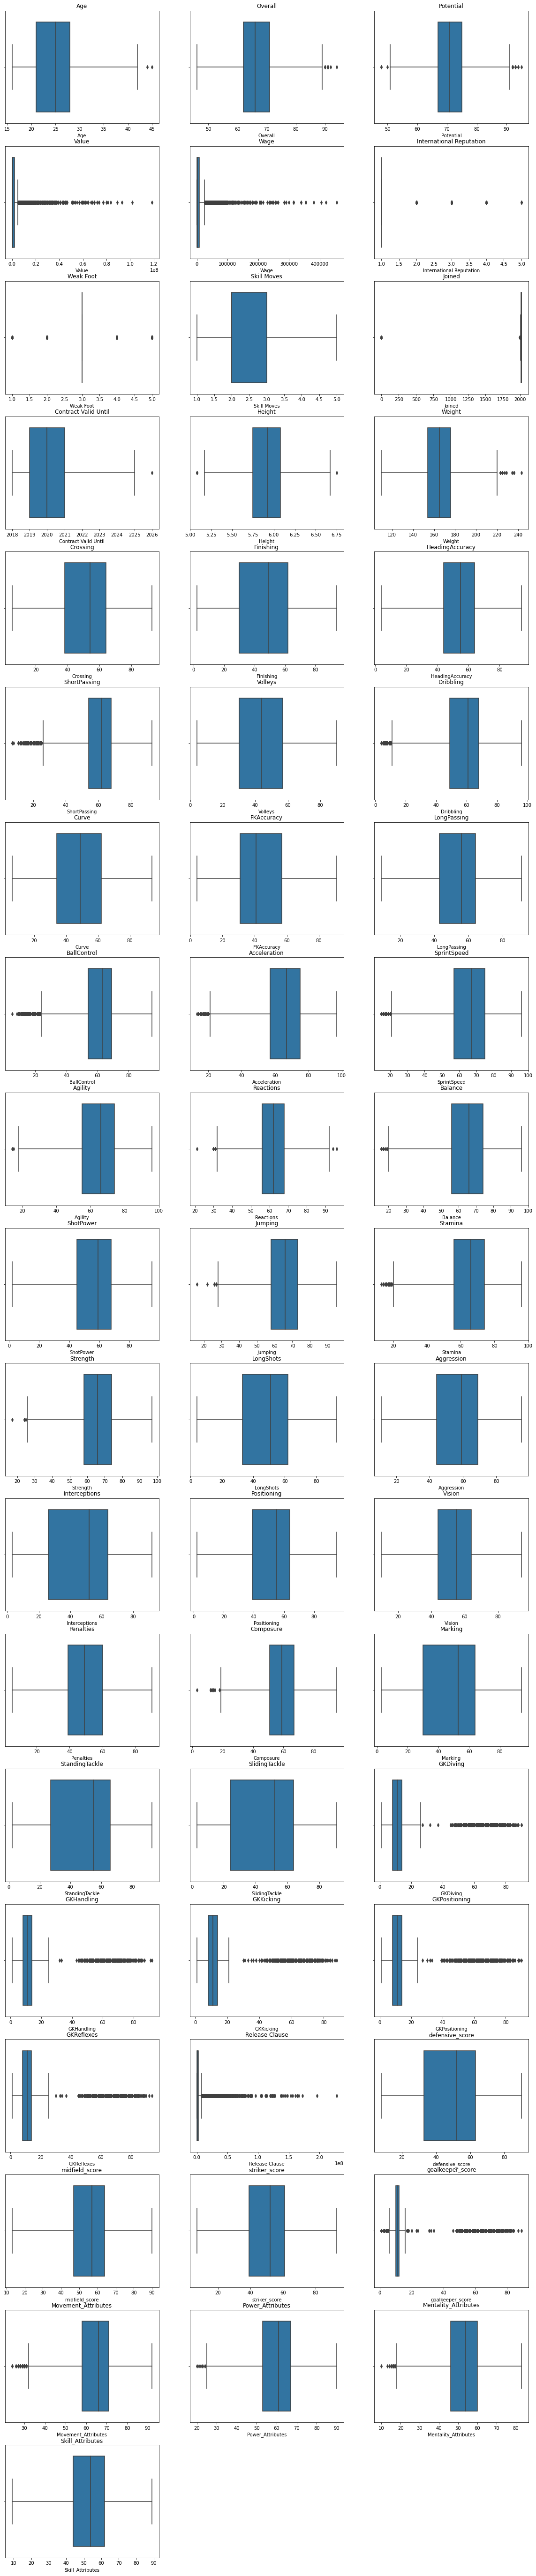

In [144]:
# checking if there are any outliers beyond whis 2. 
plt.figure(figsize=(20,100))
re=1
for i in num_vars:
    plt.subplot(19,3,re)
    plt.title(i)
    sns.boxplot(df[i], whis=2)
    re+=1
plt.tight_layout
plt.show()

# from the plots it is clear that there are so many players outside the whisker length of 2. 

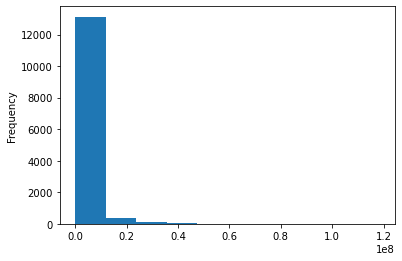

In [145]:
df["Value"].plot(kind="hist")
plt.show()

In [146]:
# The values are extremely skewed

In [141]:
fig = px.scatter(x=df['Overall'], y=df['Value'],trendline = 'ols',trendline_color_override="red")
fig.show()

In [142]:
# Valuation distribution by position
fig = px.box(df, x="General Position", y="Value")
fig.update_traces(quartilemethod="exclusive",line=dict(color='red'), fillcolor='blue',boxpoints = "outliers",marker = dict( color = 'green'))
fig.show()

### Taking into consideration the current market value of the players

In [143]:
q3=df["Value"].quantile(0.75)
q1=df["Value"].quantile(0.25)
IQR=q3-q1
UL=2*IQR+q3
LL=2*IQR-q1

In [144]:
filter = (df['Value'] >= LL) & (df['Value'] <= UL)
df_wo = df.loc[filter]

In [145]:
df[(df['Value'] >= LL) & (df['Value'] <= UL)].shape

(938, 63)

In [146]:
print("Outlier count :",df[(df['Value'] < LL) | (df['Value'] > UL)].shape[0])

Outlier count : 12719


In [147]:
fig = px.box(df_wo, x="General Position", y="Value")
fig.update_traces(quartilemethod="exclusive",line=dict(color='red'), fillcolor='blue',boxpoints = "outliers",marker = dict( color = 'green'))
fig.show()

* **Defender are valued most followed by defensive Midfielder**

* **Midfielder, Forward, and Goalkeepers are valued the least**

* **BUt this data doesn't align with hypothesis**

**There is a change in outlier values based on change in formula**

In [148]:
UL=q3+2*IQR
LL=q1-2*IQR
filter = (df['Value'] >= LL) & (df['Value'] <= UL)
df_wo = df.loc[filter]
fig = px.box(df_wo, x="General Position", y="Value")
fig.update_traces(quartilemethod="exclusive",line=dict(color='red'), fillcolor='blue',boxpoints = "outliers",marker = dict( color = 'green'))
fig.show()

* **Defensive midfielder are valued most followed by Forward and Midfielder**

* **Defenders and Goalkeepers are valued the least**

* **BUt we can see that Valuation doesn't only depend on Overall**

In [149]:
df[(df['Value'] >= LL) & (df['Value'] <= UL)].shape

(12003, 63)

In [150]:
print("Outlier count: ",df[(df['Value'] < LL) | (df['Value'] > UL)].shape[0])

Outlier count:  1654


In [151]:
# There are 1654 values outside the upper and lower whisker
# It means that these players are extreme outliers

In [152]:
# The names of outlier players
list(df[(df['Value'] < LL) | (df['Value'] > UL)]["Name"])

['Z. Junuzović',
 'F. Fajr',
 'M. Zárate',
 'Dani Rochelinhas',
 'O. Al Soma',
 'D. Alli',
 'C. Beauvue',
 'Guilherme',
 'J. Locadia',
 'N. Nkoulou',
 'R. Zieler',
 'D. Latza',
 'Loren',
 'E. Salvio',
 'Róber',
 'E. Rigoni',
 'João Novais',
 'E. Giaccherini',
 'S. Taïder',
 'D. Kourmpelis',
 'M. Kempf',
 'W. Ndidi',
 'Fred',
 'A. Ramsey',
 'Manu García',
 'Medrán',
 'A. Umar',
 'M. Demiral',
 'A. Tameze',
 'G. Ramírez',
 'Pozo',
 'Y. Ravet',
 'Jonas',
 'S. Larsson',
 'N. Barella',
 'A. Szymanowski',
 'Melendo',
 'Kiko Casilla',
 'J. Boateng',
 'M. Arnautović',
 'R. Ibarra',
 'O. Onazi',
 'M. Gradel',
 'David Simão',
 'Pol Lirola',
 'A. Smith',
 'H. Traoré',
 'Rafa',
 'F. Forestieri',
 'R. Gagliardini',
 'P. Schick',
 'M. Lemina',
 'B. Gibson',
 'F. Fazio',
 'D. Berardi',
 'Bruno Viana',
 'Hernâni',
 'Sergio Busquets',
 'Lekue',
 'L. Insigne',
 'L. Shaw',
 'Falcao',
 'R. Botta',
 'A. Gignac',
 'A. Szalai',
 'Alan Kardec',
 'Sergi Gómez',
 'Adilson Edrada',
 'R. Quaison',
 'S. Kalou',
 '

### 8. Check the Categorical variables and Find if there is any data imbalance in any column also find if any cardinality problem exists.

In [153]:
df.Name.nunique(),df.shape

(13053, (13657, 63))

In [154]:
cat_vars.remove("Name")

In [155]:
cat_vars

['Nationality',
 'Club',
 'Preferred Foot',
 'Work Rate',
 'Body Type',
 'Position',
 'Contract Valid Until']

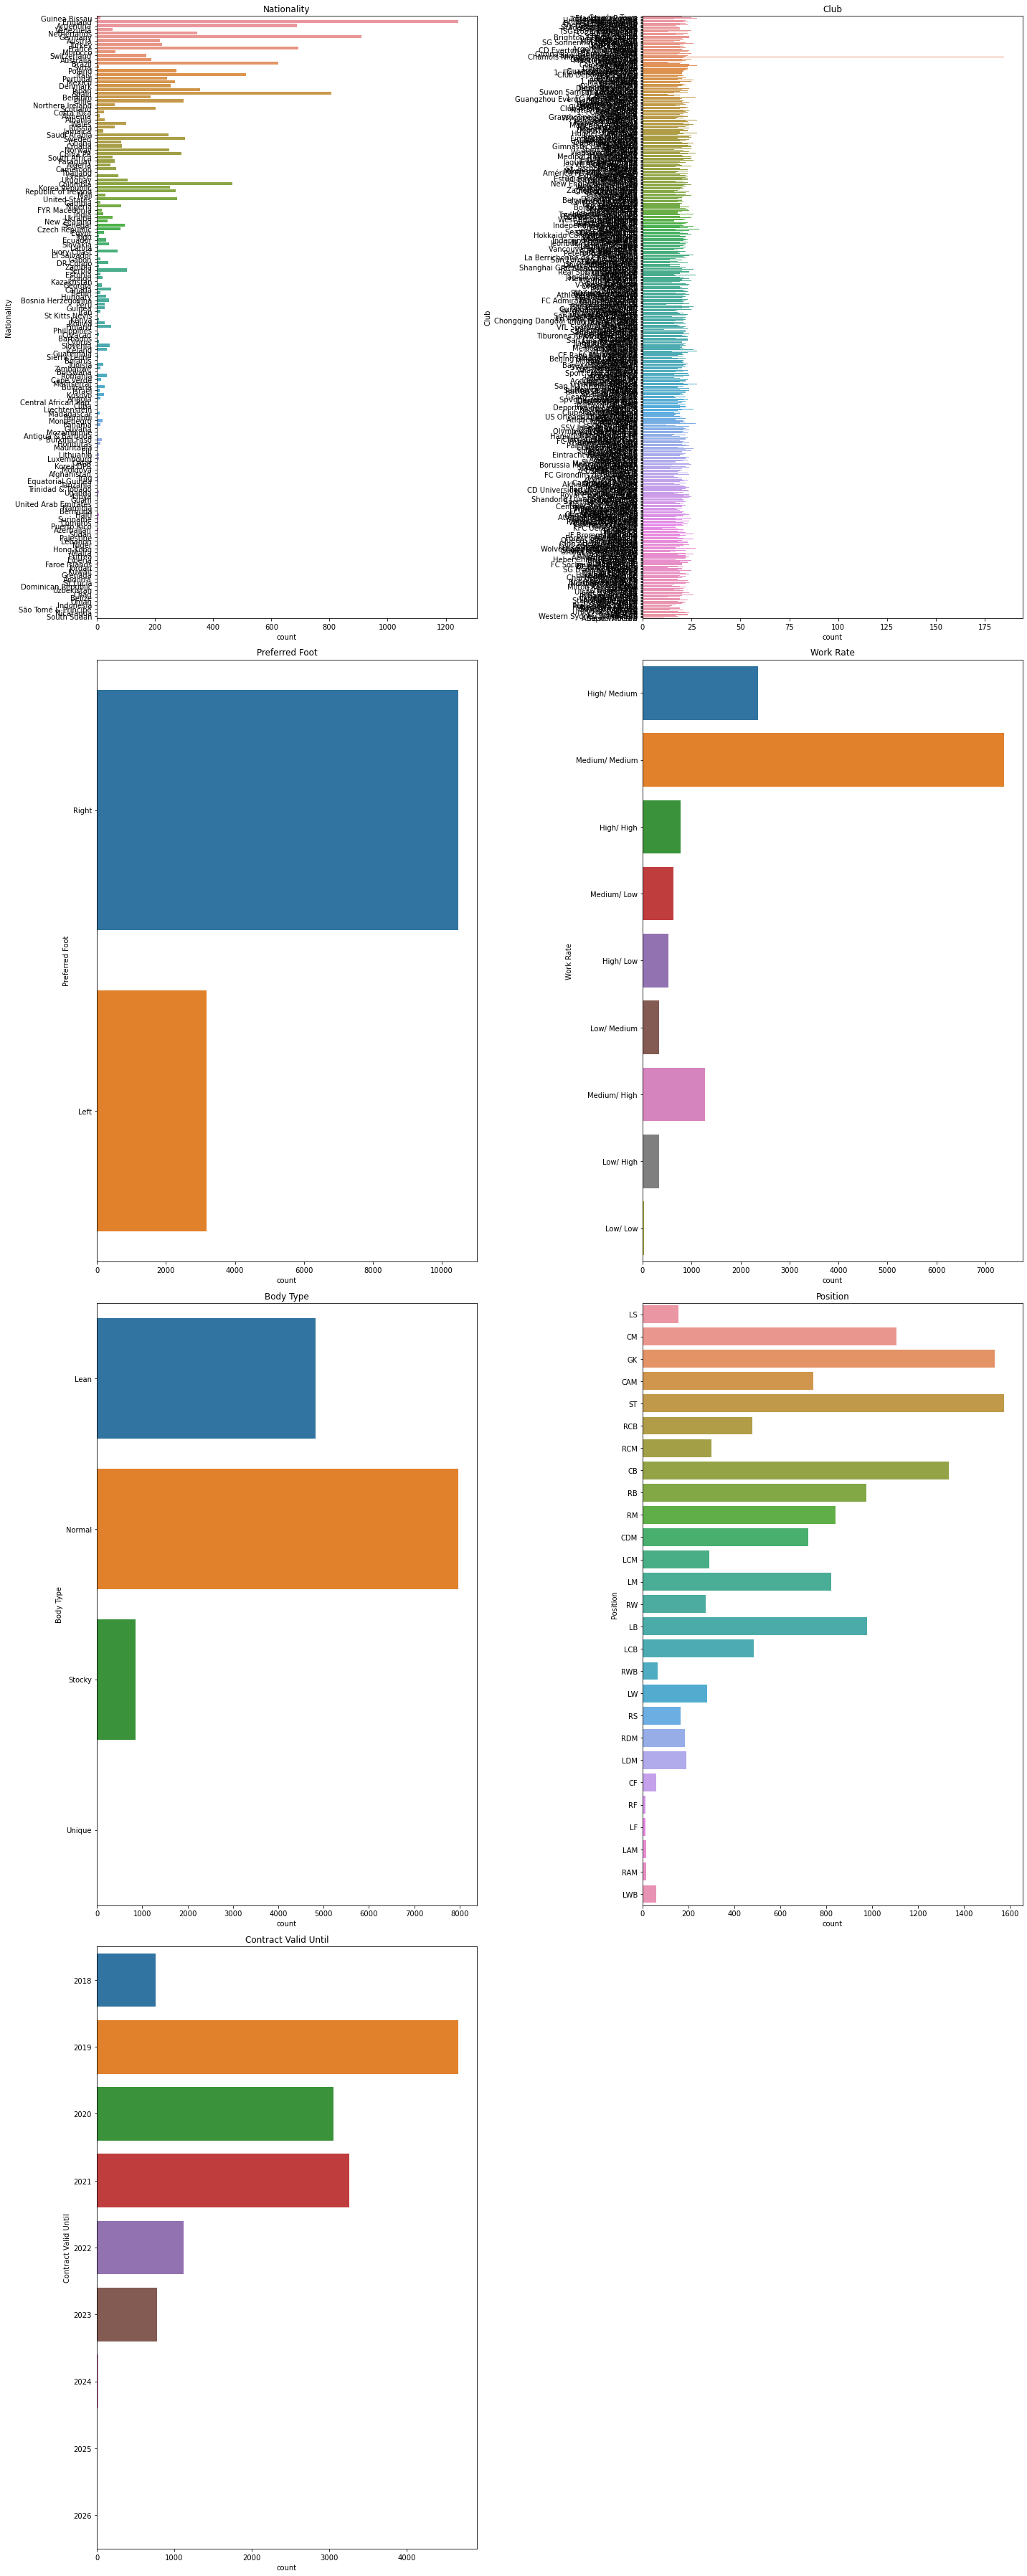

In [156]:
nrows=4
ncols=2
repeater=1

plt.figure(figsize=(20,50))

for i in cat_vars:
    plt.subplot(nrows,ncols,repeater)
    repeater+=1
    plt.title(i)
    sns.countplot(y=i,data=df)
    #plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

* There is an impbalance of categories in all the columns
* The number of unique categories in a variable is called cardinality. That problem exists in this dataset, since the number of categories in the columns varaies drastically

Categorical data is composed of a limited number of possible values. For example, a table column representing Preffered Foot contains the text values Left and Right. This column contains categorical data because it holds only two values regardless of the number of rows. In contrast, the Club column containing the text of a Club names cannot be considered as categorical data because although some of the values might be repeated—as in the case of players the values will be unique. Since repeated value can occur in non-categorical data, a test is required to differentiate between a data set composed of categorical values and a data set composed of non-categorical values that may contain repeats.

In [157]:
df.select_dtypes(include="object").nunique()

Name                13053
Nationality           160
Club                  652
Preferred Foot          2
Work Rate               9
Body Type               4
Position               27
General Position        5
dtype: int64

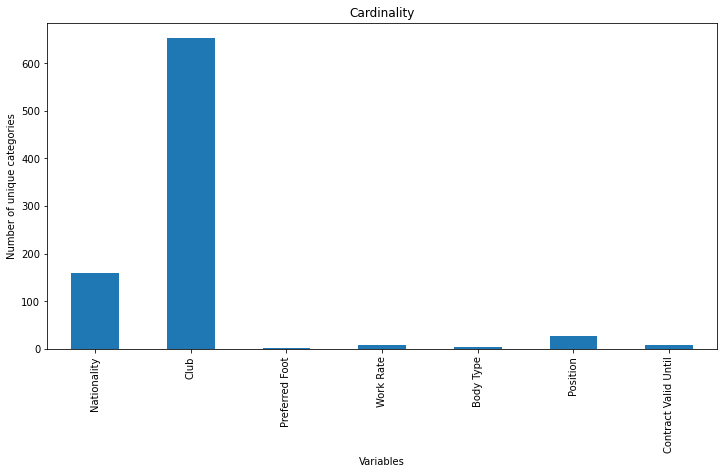

In [158]:
df[cat_vars].nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')
plt.show()

### 9. Generate pair plots for the following variables:Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

In [159]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause',
       'General Position', 'defensive_score', 'midfield_score',
       'striker_score', 'goalkeeper_score', 'Movement_Attributes',
       'Power_Attributes', 'Mentality_Attributes', 'Skill_Attributes

In [160]:
df["International Reputation"]=df["International Reputation"].astype("object")

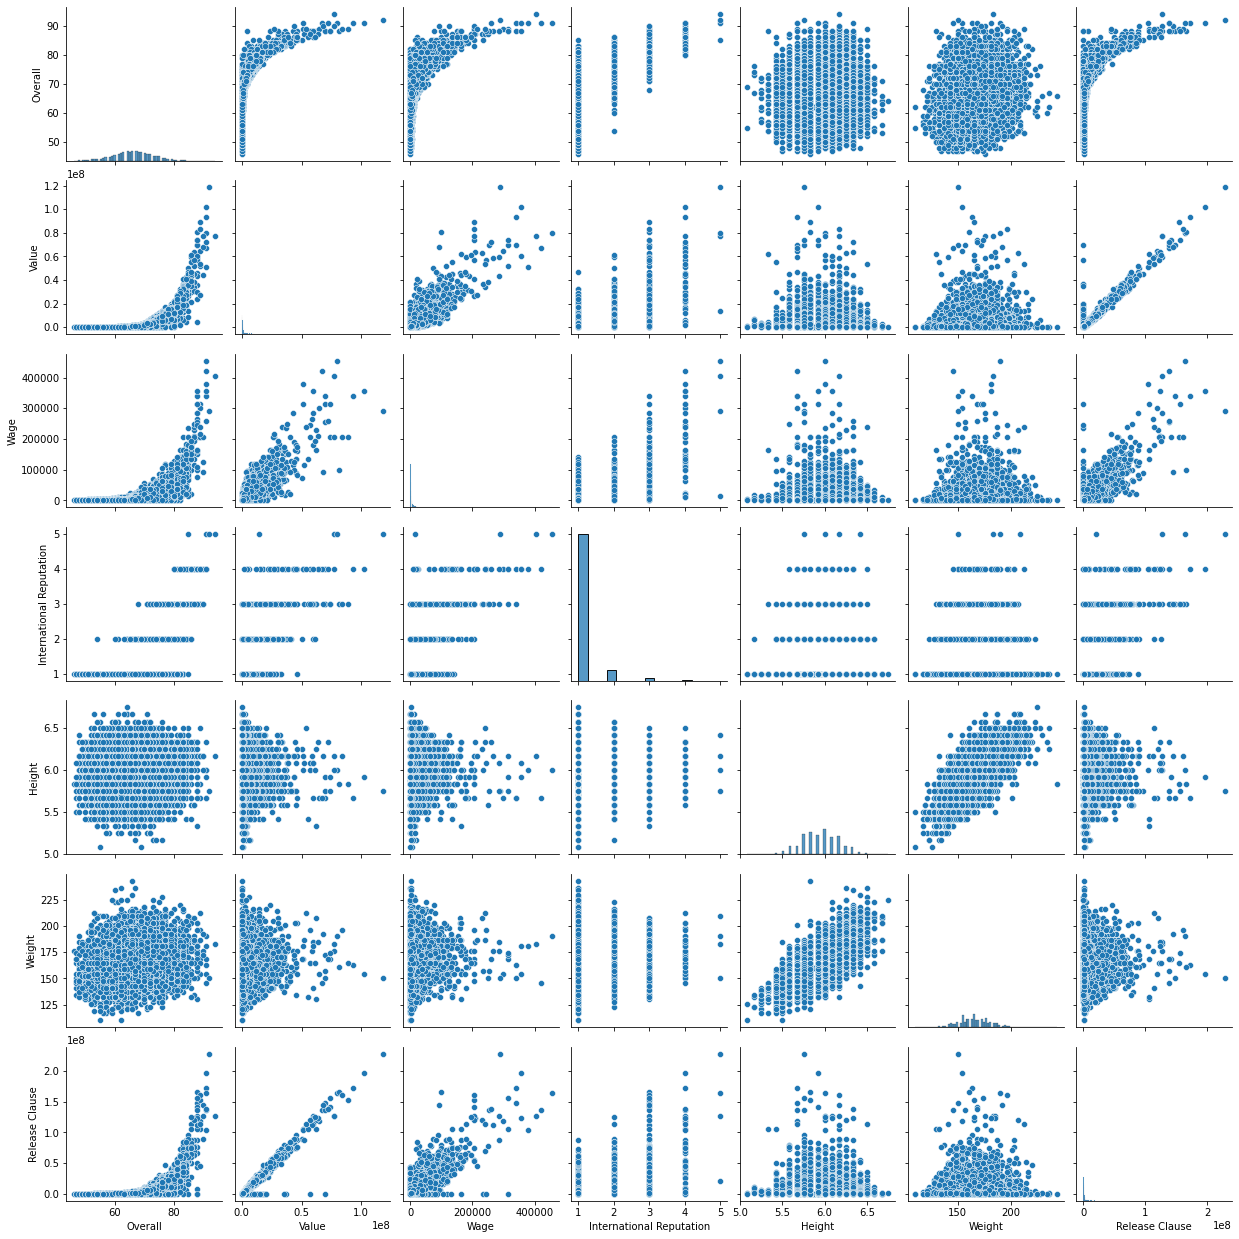

In [161]:
sns.pairplot(df[["Overall","Value","Wage","International Reputation","Height","Weight","Release Clause"]])
plt.show()

* There is a non-linear relationship between Value and Overall, Wage and Overall
* There is a linear relation between International Reputation and Overall, International Reputation and Value, International Reputation and Wage
* There is a linear relationship between Height and weight
* There is no realtion between Weight and Overall rating, Value and Weight, Overall rating and Height, Value and Height

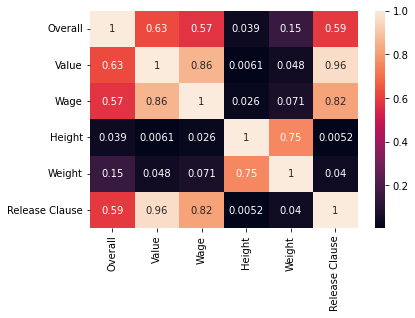

In [162]:
sns.heatmap(df[["Overall","Value","Wage","International Reputation","Height","Weight","Release Clause"]].corr(),annot=True)
plt.show()

### 10. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [163]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause',
       'General Position', 'defensive_score', 'midfield_score',
       'striker_score', 'goalkeeper_score', 'Movement_Attributes',
       'Power_Attributes', 'Mentality_Attributes', 'Skill_Attributes

In [240]:
top_20=df[df["Contract Valid Until"]==2020].sort_values(by="Overall",ascending=False).head(20)
top_20

Name  Age         Nationality  Overall  Potential  \
15989     Sergio Ramos   32               Spain       91         91   
6869         L. Modrić   32             Croatia       91         91   
20448           De Gea   27               Spain       91         93   
963          E. Hazard   27             Belgium       91         91   
20440     G. Chiellini   33               Italy       89         89   
13954     Thiago Silva   33              Brazil       88         88   
5874        C. Eriksen   26             Denmark       88         91   
9293        D. Mertens   31             Belgium       87         87   
8867        Jordi Alba   29               Spain       87         87   
13876         K. Navas   31          Costa Rica       87         87   
2478        M. Benatia   31             Morocco       86         86   
21044  T. Alderweireld   29             Belgium       86         87   
16377      Alex Sandro   27              Brazil       86         86   
3595          E. Džeko   32  Bosnia Herzegovina       85         85   
13899            Naldo   35              Brazil       85         85   
2549            Parejo   29               Spain       85         85   
22893    José Callejón   31               Spain       84         84   
1146          A. Lopes   27            Portugal       84         86   
2450          N. Matić   29              Serbia       84         84   
209              Jonas   34              Brazil       84         84   

                      Club       Value      Wage Preferred Foot  \
15989          Real Madrid  51000000.0  380000.0          Right   
6869           Real Madrid  67000000.0  420000.0          Right   
20448    Manchester United  72000000.0  260000.0          Right   
963                Chelsea  93000000.0  340000.0          Right   
20440             Juventus  27000000.0  215000.0           Left   
13954  Paris Saint-Germain  24000000.0  165000.0          Right   
5874     Tottenham Hotspur  73500000.0  205000.0          Right   
9293                Napoli  45000000.0  135000.0          Right   
8867          FC Barcelona  38000000.0  250000.0           Left   
13876          Real Madrid  30500000.0  195000.0          Right   
2478              Juventus  30000000.0  160000.0          Right   
21044    Tottenham Hotspur  39000000.0  150000.0          Right   
16377             Juventus  36500000.0  160000.0           Left   
3595                  Roma  30500000.0  115000.0          Right   
13899        FC Schalke 04   9000000.0   38000.0          Right   
2549           Valencia CF  37000000.0   66000.0          Right   
22893               Napoli  27500000.0  105000.0          Right   
1146    Olympique Lyonnais  25000000.0   72000.0           Left   
2450     Manchester United  24000000.0  165000.0           Left   
209             SL Benfica  16500000.0   25000.0          Right   

      International Reputation  ...  Release Clause      General Position  \
15989                      4.0  ...     104600000.0              Defender   
6869                       4.0  ...     137400000.0            Midfielder   
20448                      4.0  ...     138600000.0            Goalkeeper   
963                        4.0  ...     172100000.0               Forward   
20440                      4.0  ...      44600000.0              Defender   
13954                      4.0  ...      44400000.0              Defender   
5874                       3.0  ...     141500000.0            Midfielder   
9293                       3.0  ...      76500000.0               Forward   
8867                       3.0  ...      77900000.0              Defender   
13876                      3.0  ...      62500000.0            Goalkeeper   
2478                       3.0  ...      49500000.0              Defender   
21044                      3.0  ...      75100000.0              Defender   
16377                      3.0  ...      60200000.0              Defender   
3595                       3.0  ...     

In [165]:
list(df[df["Contract Valid Until"]==2020].sort_values(by="Overall",ascending=False).head(20)["Name"])

['Sergio Ramos',
 'L. Modrić',
 'De Gea',
 'E. Hazard',
 'G. Chiellini',
 'Thiago Silva',
 'C. Eriksen',
 'D. Mertens',
 'Jordi Alba',
 'K. Navas',
 'M. Benatia',
 'T. Alderweireld',
 'Alex Sandro',
 'E. Džeko',
 'Naldo',
 'Parejo',
 'José Callejón',
 'A. Lopes',
 'N. Matić',
 'Jonas']

### 1. What would the average wage for this set of players be?

In [166]:
top_20["Wage"].mean()

181050.0

In [167]:
print("Avg wage for these players :",top_20["Wage"].mean())

Avg wage for these players : 181050.0


### 2. What is the average age?

In [168]:
top_20["Age"].mean()

30.25

In [169]:
print("Avg age for these players :",round(top_20["Age"].mean()))

Avg age for these players : 30


### 3. Is there a correlation between the Overall rating and Value for these players? If Yes what kind of relationship that the features have, also explain why this kind of relationship could happen.

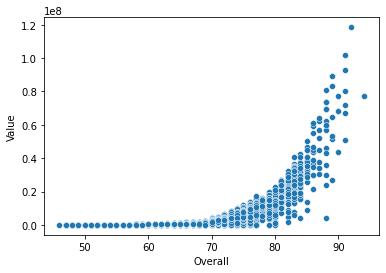

In [170]:
sns.scatterplot(df["Overall"],df["Value"])
plt.show()

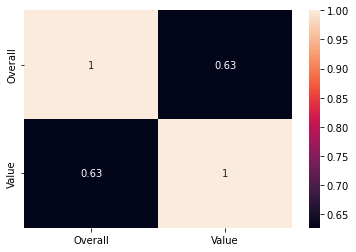

In [171]:
sns.heatmap(df[["Overall","Value"]].corr(),annot=True)
plt.show()

In [172]:
# They show positive correlation

### 11. Generate tables containing the top 5 players by Overall rating for each unique position.

In [173]:
df["Position"].nunique()

27

In [174]:
positions=list(df["Position"].unique())
print(positions)

['LS', 'CM', 'GK', 'CAM', 'ST', 'RCB', 'RCM', 'CB', 'RB', 'RM', 'CDM', 'LCM', 'LM', 'RW', 'LB', 'LCB', 'RWB', 'LW', 'RS', 'RDM', 'LDM', 'CF', 'RF', 'LF', 'LAM', 'RAM', 'LWB']


In [175]:
print("Goalkeepers")
print(tabulate(df[['Name', 'Overall']][df['Position']=='GK'].sort_values('Overall', ascending = False).head(5),showindex = False,tablefmt='fancy_grid'))

Goalkeepers
╒═══════════════╤════╕
│ De Gea        │ 91 │
├───────────────┼────┤
│ J. Oblak      │ 90 │
├───────────────┼────┤
│ T. Courtois   │ 89 │
├───────────────┼────┤
│ G. Buffon     │ 88 │
├───────────────┼────┤
│ S. Handanovič │ 88 │
╘═══════════════╧════╛


In [176]:
df[['Name', 'Overall']][df['Position']=="GK"].sort_values('Overall', ascending = False).head(5)

Name  Overall
20448         De Gea       91
16245       J. Oblak       90
21686    T. Courtois       89
16367      G. Buffon       88
18432  S. Handanovič       88

In [177]:
def top_best_position_print(df, pos):
    print(tabulate(df[['Name', 'Overall']][df['Position']==pos].sort_values('Overall', ascending = False).head(5),showindex = False,headers = ['Name', 'Rating at ' + pos],tablefmt='fancy_grid'))

In [178]:
for i in positions:
    print("~~~~~~~~~~~",i,"~~~~~~~~~~~")
    top_best_position_print(df,i)

~~~~~~~~~~~ LS ~~~~~~~~~~~
╒═══════════════╤════════════════╕
│ Name          │   Rating at LS │
╞═══════════════╪════════════════╡
│ G. Higuaín    │             88 │
├───────────────┼────────────────┤
│ Diego Costa   │             85 │
├───────────────┼────────────────┤
│ A. Gómez      │             84 │
├───────────────┼────────────────┤
│ Gerard Moreno │             83 │
├───────────────┼────────────────┤
│ M. Arnautović │             82 │
╘═══════════════╧════════════════╛
~~~~~~~~~~~ CM ~~~~~~~~~~~
╒═════════════════════╤════════════════╕
│ Name                │   Rating at CM │
╞═════════════════════╪════════════════╡
│ S. Milinković-Savić │             85 │
├─────────────────────┼────────────────┤
│ I. Gündoğan         │             84 │
├─────────────────────┼────────────────┤
│ Jorginho            │             84 │
├─────────────────────┼────────────────┤
│ Cesc Fàbregas       │             83 │
├─────────────────────┼────────────────┤
│ N. Keïta            │             83 │

### 1. Are there any players appearing at more than one table? Please point out such players.

In [179]:
def top_best_position(df, pos):
    #print(tabulate(df[['Name', 'Overall']][df['Position']==pos].sort_values('Overall', ascending = False).head(5),showindex = False,headers = ['Name', 'Rating at ' + pos],tablefmt='fancy_grid'))
    return(df[['Position','Name', 'Overall']][df['Position']==pos].sort_values('Overall', ascending = False).head(5))

In [180]:
top_best_position(df,"GK")

Position           Name  Overall
20448       GK         De Gea       91
16245       GK       J. Oblak       90
21686       GK    T. Courtois       89
16367       GK      G. Buffon       88
18432       GK  S. Handanovič       88

top_best_bypos={"Position":[],"Name":[],"Rating":[]}
for i in df["Position"]:
    result=top_best_position(df,i)
    top_best_bypos["Position"].append(i)
    top_best_bypos["Name"].append(result["Name"])
    top_best_bypos["Rating"].append(result["Overall"])

In [181]:
result=top_best_position(df,"GK")
result

Position           Name  Overall
20448       GK         De Gea       91
16245       GK       J. Oblak       90
21686       GK    T. Courtois       89
16367       GK      G. Buffon       88
18432       GK  S. Handanovič       88

In [182]:
result=pd.DataFrame(columns=["Position","Name","Overall Rating"])
for i in positions:
    temp=top_best_position(df,i)
    result=result.append(temp, ignore_index=True)

In [183]:
result.drop("Overall Rating",axis=1,inplace=True)

In [184]:
result["Name"].value_counts().sum()

135

In [185]:
# There are no such players appearing in more than one table

In [186]:
more_than_one=pd.crosstab(result["Position"],result["Name"])
more_than_one

Name      A. Di María  A. Florenzi  A. Gómez  A. Milik  A. Robben  A. Vidal  \
Position                                                                      
CAM                 0            0         0         0          0         1   
CB                  0            0         0         0          0         0   
CDM                 0            0         0         0          0         0   
CF                  0            0         0         1          0         0   
CM                  0            0         0         0          0         0   
GK                  0            0         0         0          0         0   
LAM                 0            0         0         0          0         0   
LB                  0            0         0         0          0         0   
LCB                 0            0         0         0          0         0   
LCM                 0            0         0         0          0         0   
LDM                 0            0         0         0          0         0   
LF                  0            0         0         0          0         0   
LM                  0            0         0         0          0         0   
LS                  0            0         1         0          0         0   
LW                  0            0         0         0          0         0   
LWB                 0            0         0         0          0         0   
RAM                 0            0         0         0          0         0   
RB                  0            1         0         0          0         0   
RCB                 0            0         0         0          0         0   
RCM                 0            0         0         0          0         0   
RDM                 0            0         0         0          0         0   
RF                  0            0         0         0          0         0   
RM                  1            0         0         0          1         0   
RS                  0            0         0         0          0         0   
RW                  0            0         0         0          0         0   
RWB                 0            0         0         0          0         0   
ST                  0            0         0         0          0         0   

Name      Aday Benítez  Alex Sandro  Allan Bardinho  Azpilicueta  ...  \
Position                                                          ...   
CAM                  0            0               0            0  ...   
CB                   0            0               0            0  ...   
CDM                  0            0               0            0  ...   
CF                   0            0               0            0  ...   
CM                   0            0               0            0  ...   
GK                   0            0               0            0  ...   
LAM                  0            0               0            0  ...   
LB                   0            1               0            0  ...   
LCB                  0            0               0            0  ...   
LCM                  0            0               0            0  ...   
LDM                  0            0               0            0  ...   
LF                   0            0               0            0  ...   
LM                   0            0               0            0  ...   
LS                   0            0               0            0  ...   
LW                   0            0               0            0  ...   
LWB                  1            0               0            0  ...   
RAM                  0            0               1            0  ...   
RB                   0            0               0            1  ...   
RCB                  0            0               0            0  ...   
RCM                  0            0               0            0  ...   
RDM                  0            0               0            0  ...   
RF                   0       

In [187]:
cols = more_than_one.columns
bt = more_than_one.apply(lambda x: x != 0)
dict1=bt.apply(lambda x: set(cols[x.values]), axis=1)

In [188]:
names=set()
for i in dict1.index:
    names.update(dict1[i])

In [189]:
print(len(names))
print(names)

135
{'J. Seri', 'L. Bender', 'D. Tadić', 'Kauã Abranches', 'Y. Ōsako', 'Granell', 'Alex Sandro', 'Koke', 'J. Vertonghen', 'L. Bonucci', 'K. Walker', 'Parejo', 'Iniesta', 'L. Stindl', 'M. Verratti', 'Jordi Alba', 'Sergio Ramos', 'L. Suárez', 'Deulofeu', 'R. Aguilar', 'R. Lewandowski', 'William Carvalho', 'Marcelo', 'J. Mojica', 'M. Benatia', 'Jonathan Viera', 'P. Kadeřábek', 'S. Agüero', 'Raffael', 'M. Hummels', 'Marquinhos', 'Jonny', 'Lucas Leiva', 'S. Coleman', 'Pizzi', 'E. Hazard', 'A. Di María', 'R. Mahrez', 'Naldo', 'M. Özil', 'P. Aubameyang', 'K. Lala', 'M. Arnautović', 'Nicolás Formido', 'L. Sané', 'Paulinho', 'Marcos Alonso', 'T. Müller', 'S. Umtiti', 'Gerard Moreno', 'J. Cuadrado', 'Z. Ibrahimović', 'Aday Benítez', 'P. Pogba', 'K. Mbappé', 'T. Werner', 'L. Insigne', 'M. Brozović', 'B. Oczipka', 'Fabrio Farinha', 'A. Vidal', 'A. Florenzi', 'Allan Bardinho', 'G. Higuaín', 'J. Oblak', 'De Gea', 'Falcao', 'L. Podolski', 'K. Manolas', 'N. Otamendi', 'J. Kimmich', 'Cristiano Ronaldo'

**All the names are unique, no repeated players**

### 2. What is the average wage one can expect to pay for the top 5 in every position?

In [190]:
df[['Position','Name', 'Overall','Wage']][df['Position']=="GK"].sort_values('Overall', ascending = False).head(5)["Wage"].mean()

156200.0

In [191]:
def avg_wage_byposition(df, pos):
    result=df[['Position','Name', 'Overall',"Wage"]][df['Position']==pos].sort_values('Overall', ascending = False).head(5)
    avg=result["Wage"].mean()
    return(pos,avg)

In [192]:
avg_wage_byposition(df,"GK")

('GK', 156200.0)

In [193]:
dict2={"Position":[],"Average Wage":[]}
for i in positions:
    temp=avg_wage_byposition(df,i)
    dict2["Position"].append(temp[0])
    dict2["Average Wage"].append(temp[1])

In [194]:
pd.DataFrame(dict2)

Position  Average Wage
0        LS      114200.0
1        CM      132600.0
2        GK      156200.0
3       CAM      168000.0
4        ST      294000.0
5       RCB      219000.0
6       RCM      218600.0
7        CB      139600.0
8        RB      136000.0
9        RM      134000.0
10      CDM      179400.0
11      LCM       73600.0
12       LM      147600.0
13       RW      136200.0
14       LB      175600.0
15      LCB      158200.0
16      RWB       41200.0
17       LW      261000.0
18       RS      133800.0
19      RDM      105000.0
20      LDM      105200.0
21       CF       42000.0
22       RF       38600.0
23       LF      123200.0
24      LAM       81800.0
25      RAM       46600.0
26      LWB       32800.0

In [195]:
# The avg wage per each position, based on top 5 players's wage

# Statistical Analysis:

In [196]:
import scipy.stats as stats
# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

### 1. Test statistically whether the Left-hand player’s overall rating is higher than the Right-hand overall score. Alpha = 0.05
Before checking the test, Kindly make sure data is normally distributed.

In [197]:
df["Preferred Foot"].value_counts()

Right    10483
Left      3174
Name: Preferred Foot, dtype: int64

In [198]:
# Check assumptions
left=df[df["Preferred Foot"]=="Left"]["Overall"]
right=df[df["Preferred Foot"]=="Right"]["Overall"]

**Significance level at 95%**

In [199]:
# Check normality
print(stats.shapiro(left)) # data is not normal
print(stats.shapiro(right)) # data is not normal

ShapiroResult(statistic=0.995132327079773, pvalue=9.821189195236002e-09)
ShapiroResult(statistic=0.9966455101966858, pvalue=9.599755581115362e-15)


In [200]:
# Check variability
stats.levene(left,right) # Data doesnot follow equality in variance

LeveneResult(statistic=28.871024884639752, pvalue=7.863139450069704e-08)

The null and alternative hypothesis is:

H0:  𝜇1−𝜇2≤0
 
H1:  𝜇1−𝜇2>0

In [201]:
# Hypothesis
# Ho:  rating for left <= ratings for right
# Ha: rating for left  >  rating for right

In [202]:
n_l = len(left)
l_mean = left.mean()
l_std = left.std()

n_r = len(right)
r_mean = np.mean(right)
r_std = right.std()

In [203]:
# pass the value in null hypothesis to the parameter, 'value'
# pass the one-tailed condition to the parameter, 'alternative'
z_score, pval = stests.ztest(x1 = left, x2 = right, value = 0, alternative = 'larger')

# print the test statistic and corresponding p-value
print("Z-score: ", z_score)
print("p-value: ", pval)

Z-score:  4.818698267397325
p-value:  7.224894349724768e-07


In [204]:
# calculate the 99% confidence interval for the population mean
# pass the difference between the sample means to the parameter, 'loc'
# pass the scaling factor np.sqrt((nl_std^2 / n1 + (sgl_std^2 / n2)) to the parameter, 'scale'
print('Confidence interval:', stats.norm.interval(0.95, loc = l_mean - r_mean, 
                                                scale = np.sqrt(((l_std**2) / n_l) + ((r_std**2) / n_r))))

Confidence interval: (0.4098927716259872, 0.9366019071593321)


In [205]:
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.64


i.e. if z is greater than 1.64 then we reject the null hypothesis.

* Since the z-score is greater than z-test value, we reject the null hypothesis
* **the Left-hand player’s overall rating is higher than the Right-hand overall score**

### 2. Does the age factor affect the player’s potential? Check the claim that the players who are greater than 35, their potential will be lesser than those whose age is less than 35. Alpha = 0.05

The null and alternative hypothesis is:

H0:  𝜇1−𝜇2>=0
 
H1:  𝜇1−𝜇2<0

In [206]:
# Hypothesis (Num vs Cat(2))
# Ho: mu1(Players >35) >= m2(Players <35)
# Ha: mu1(Players >35) < mu2(Players <35)

In [207]:
df[["Age","Potential"]].head(2)

Age  Potential
0   21         69
1   27         68

In [208]:
# Creating the data based on age categories as >35 and <=35
greater=df[df["Age"]>35]["Potential"]
less=df[df["Age"]<=35]["Potential"]

In [209]:
# Check normality
print(stats.shapiro(greater)) # data is not normal
print(stats.shapiro(less)) # data is not normal

ShapiroResult(statistic=0.9832170605659485, pvalue=0.015235604718327522)
ShapiroResult(statistic=0.9929604530334473, pvalue=4.337636489905045e-25)


In [210]:
stats.levene(greater,less) # data is showing equal variance

LeveneResult(statistic=0.6285195227731065, pvalue=0.42791265695632696)

In [211]:
n_g = len(greater)
g_mean = greater.mean()
g_std = greater.std()

n_l = len(less)
l_mean = np.mean(less)
l_std = less.std() 

In [212]:
# pass the value in null hypothesis to the parameter, 'value'
# pass the one-tailed condition to the parameter, 'alternative'
z_score, pval = stests.ztest(x1 = greater, x2 = less, value = 0, alternative = 'smaller')

# print the test statistic and corresponding p-value
print("Z-score: ", z_score)
print("p-value: ", pval)

Z-score:  -7.333267252372195
p-value:  1.1230419814971094e-13


* Pval<0.05, reject null hypothesis
* **the players who are greater in age than 35, their potential will be lesser than those whose age is less than 35**

### 3. Use the statistical test to check the relationship between the Preferred Foot and Position with the 99% confident interval.

Hypothesis

Ho: Preferred Foot is not related to Position

Ha: Preferred Foot is related to Position

In [213]:
pd.crosstab(df["Preferred Foot"],df["Position"])

Position        CAM    CB  CDM  CF   CM    GK  LAM   LB  LCB  LCM  ...   RB  \
Preferred Foot                                                     ...        
Left            202   254   99  12  195   159    7  863  198   75  ...   10   
Right           540  1078  622  46  911  1373    7  115  286  216  ...  963   

Position        RCB  RCM  RDM  RF   RM   RS   RW  RWB    ST  
Preferred Foot                                               
Left             26   30   19   3  189   29   74    2   208  
Right           452  269  164   9  650  137  200   63  1367  

[2 rows x 27 columns]

In [214]:
# Cat vs cat: chi2_contingency test
test_stat,pval,dof,values=stats.chi2_contingency(pd.crosstab(df["Preferred Foot"],df["Position"]))
test_stat,pval,dof,values

(3391.844915260365,
 0.0,
 26,
 array([[ 172.44695028,  309.56784067,  167.56637622,   13.47968075,
          257.0435674 ,  356.04949843,    3.25371604,  227.29530644,
          112.48561177,   67.63081204,   43.92516658,    3.02130775,
          190.8072051 ,   36.02328476,   65.07432086,   13.94449733,
            3.95094091,  226.13326499,  111.09116204,   69.49007835,
           42.53071685,    2.78889947,  194.99055429,   38.57977594,
           63.67987113,   15.10653877,  366.04305484],
        [ 569.55304972, 1022.43215933,  553.43362378,   44.52031925,
          848.9564326 , 1175.95050157,   10.74628396,  750.70469356,
          371.51438823,  223.36918796,  145.07483342,    9.97869225,
          630.1927949 ,  118.97671524,  214.92567914,   46.05550267,
           13.04905909,  746.86673501,  366.90883796,  229.50992165,
          140.46928315,    9.21110053,  644.00944571,  127.42022406,
          210.32012887,   49.89346123, 1208.95694516]]))

In [215]:
def check_hypo(pval,alpha):
    if pval<alpha:
        return("Reject Null Hypothesis")
    else:
        return("Fail to reject Null hypothesis")

In [216]:
check_hypo(pval,0.01)

'Reject Null Hypothesis'

* Reject null hypothesis
* **Preferred Foot is related to Position**

### 4. Does the International Reputation cause a significant effect on players' Wages? Check the claim with a 0.04 significance level. Check the Normality of data before the actual test.

Ho: International Reputation does not cause a significant effect on players' Wages

Ha: International Reputation cause a significant effect on players' Wages

In [226]:
df["International Reputation"].value_counts()

1.0    12464
2.0      928
3.0      224
4.0       37
5.0        4
Name: International Reputation, dtype: int64

In [223]:
data1=df[df["International Reputation"]==1.0]["Wage"]
data2=df[df["International Reputation"]==2.0]["Wage"]
data3=df[df["International Reputation"]==3.0]["Wage"]
data4=df[df["International Reputation"]==4.0]["Wage"]
data5=df[df["International Reputation"]==5.0]["Wage"]

In [228]:
# More than 2 categories, cheking with f_oneway

In [229]:
# Checking normality
stat, p_value = stats.shapiro(df['Wage'])

# print the p-value
print('p-value:', p_value) 

p-value: 0.0


In [230]:
check_hypo(p_value,0.04) # data is not normal

'Reject Null Hypothesis'

In [231]:
stat, p_value = stats.levene(data1, data2, data3, data4, data5)

# print the p-value 
print('P-Value:', p_value)

P-Value: 0.0


In [232]:
check_hypo(p_value,0.04) # data is not equal in variance
# thus we cannot say that the population variances are equal for all the samples

'Reject Null Hypothesis'

In [233]:
# perform one-way ANOVA
# pass the given data
f_test, p_val = stats.f_oneway(data1, data2, data3, data4, data5)

# print the test statistic and corresponding p-value
print('Test statistic:', f_test)
print('p-value:', p_val)

Test statistic: 3485.1081736616093
p-value: 0.0


In [234]:
check_hypo(p_value,0.04)

'Reject Null Hypothesis'

* Reject Null hypothesis
* **International Reputation cause a significant effect on players' Wages**

### 5. Check the claim that the median wages of under top 20 players are lesser than or equal to 25000. Test the claim with a 0.05 % significance level. Check the data is normally distributed or not before the testing the claim statistically.

Hypothesis

Ho: top_20 median <= 25000

Ha: top_20 median > 25000

top_20_under=df[df["Contract Valid Until"]==2020].sort_values(by="Overall",ascending=False)
top_20_under=top_20_under[20:]

top_20.shape,top_20_under.shape

In [278]:
median_val=top_20["Wage"].median()
median_val,top_20["Wage"].mean()

(162500.0, 181050.0)

In [269]:
# Checking normality
stat, p_value = stats.shapiro(top_20["Wage"])

# print the p-value
print('p-value:', p_value)
check_hypo(p_value,0.05) # data is normal

p-value: 0.26102718710899353


'Fail to reject Null hypothesis'

**Since data is normal, and in normally distributed data mean=median=mode, we will be applying one tail ztest**

In [277]:
z_score, pval = stests.ztest(x1 = top_20["Wage"], value = 25000, alternative = 'larger')

# print the test statistic and corresponding p-value
print("Z-score: ", z_score)
print("p-value: ", pval)

Z-score:  6.4939746361365565
p-value:  4.180041452055297e-11


In [280]:
check_hypo(pval,0.05)

'Reject Null Hypothesis'

#### By z-test-
* Reject null hypothesis
* **top_20 median > 25000**

In [285]:
z_stat=(top_20["Wage"].median()-25000)/top_20["Wage"].std()
z_stat

1.2794829865120858

In [286]:
pval=stats.norm.sf(z_stat)
pval

0.10036351353320916

In [287]:
check_hypo(pval,0.05)

'Fail to reject Null hypothesis'

#### By median used in formula -
* Fail to reject null hypothesis
* **top_20 median <= 25000**

In [288]:
# Since checking for median, applying MannWhitney u
stats.mannwhitneyu(top_20["Wage"],25000,alternative="greater")

MannwhitneyuResult(statistic=19.5, pvalue=0.06840829970936652)

In [289]:
check_hypo(pval,0.05)

'Fail to reject Null hypothesis'

#### By MannWhitneyU test- 
* Fail to reject null hypothesis
* **top_20 median <= 25000**

# Major Challenge

!pip install geopandas

In [293]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

## 1. Plot the wages of players based on nationality on the world map. 

In [290]:
data=df.groupby('Nationality')[['Wage']].mean().sort_values(by='Wage',ascending=False)
data

Wage
Nationality                       
United Arab Emirates  39000.000000
Gabon                 35000.000000
Philippines           28000.000000
Armenia               24000.000000
Croatia               23160.919540
...                            ...
Jordan                 1000.000000
Qatar                  1000.000000
Afghanistan            1000.000000
Bolivia                 814.814815
India                     0.000000

[160 rows x 1 columns]

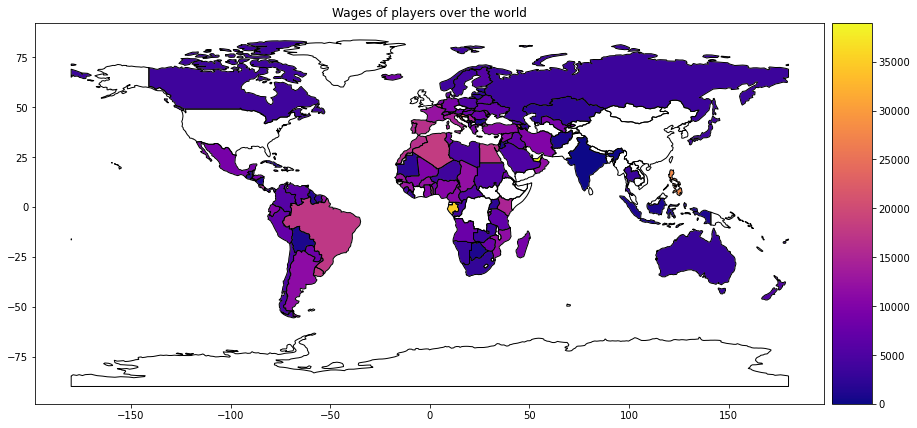

In [294]:
# Plot world map boundaries
# Load world geometries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_title('Wages of players over the world')
world.boundary.plot(ax=ax, linewidth=1, color='black')


# Group data by country and wage 
players_wages_by_nationality = df.groupby('Nationality')[['Wage']].mean().reset_index()
players_wages_by_nationality.columns = ['Nationality','Wage']

# Merge crash data with world map data
merged_data = world.merge(players_wages_by_nationality, left_on='name', right_on='Nationality', how='left')


# Plot wage data
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merged_data.plot(column='Wage', cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)

# Show the map
plt.show()



## 2. Find the average potential of players of clubs of different nationality, then find the natioanlities in each club with average potential more than 80 and suggest that natioanlities from where the clubs can pick players.

In [295]:
# to get the avg potential of the players based on nationality and club
data=df.groupby(['Club','Nationality'])[['Potential']].mean().sort_values(by='Potential', ascending=False).reset_index()
data

Club Nationality  Potential
0                   Juventus   Argentina       94.0
1                   Juventus    Portugal       94.0
2            Atlético Madrid    Slovenia       93.0
3            Manchester City     Belgium       92.0
4                      Inter    Slovakia       92.0
...                      ...         ...        ...
4274        New York City FC    Colombia       58.0
4275       IF Brommapojkarna       Spain       58.0
4276            Lincoln City       Spain       57.0
4277  St. Patrick's Athletic      France       57.0
4278         SK Slavia Praha     Croatia       55.0

[4279 rows x 3 columns]

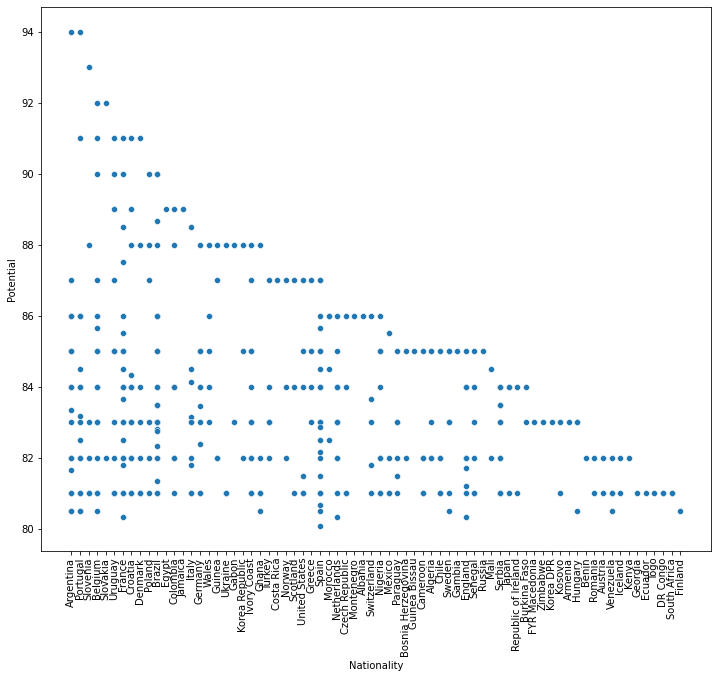

In [296]:
plt.figure(figsize=(12,10))
data1=data[data['Potential']>80]   # filtering the players and clubs with potentail > 80
sns.scatterplot(x=data1.Nationality, y=data1.Potential)
plt.xticks(rotation=90)
plt.show()

In [302]:
data2=data1.groupby('Nationality')[['Potential']].std()  # find potenstial variation 
# all these countries could be good to select players 
print("All these countries could be good to select players :",list(data2[~((data2.Potential<-3) | (data2.Potential>3))].index))

All these countries could be good to select players : ['Albania', 'Algeria', 'Armenia', 'Austria', 'Benin', 'Bosnia Herzegovina', 'Brazil', 'Burkina Faso', 'Cameroon', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'DR Congo', 'Ecuador', 'Egypt', 'England', 'FYR Macedonia', 'Finland', 'France', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guinea Bissau', 'Hungary', 'Iceland', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Kenya', 'Korea DPR', 'Korea Republic', 'Kosovo', 'Mali', 'Mexico', 'Montenegro', 'Morocco', 'Netherlands', 'Nigeria', 'Norway', 'Paraguay', 'Republic of Ireland', 'Romania', 'Russia', 'Scotland', 'Senegal', 'Serbia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Togo', 'Turkey', 'United States', 'Venezuela', 'Wales', 'Zimbabwe']


## 3. Top 20 U-21 highest market value players

In [322]:
print(tabulate(df[['Name','Age','Nationality','Overall',"Value"]][df["Age"]<21].sort_values(by="Overall",ascending=False).head(20), showindex = False, headers=['Name','Age','Nationality','Overall',"Value"]))

Name                   Age  Nationality      Overall     Value
-------------------  -----  -------------  ---------  --------
K. Mbappé               19  France                88  8.1e+07
M. de Ligt              18  Netherlands           82  2.7e+07
L. Bailey               20  Jamaica               81  2.65e+07
M. Rashford             20  England               81  2.7e+07
K. Havertz              19  Germany               80  2.2e+07
V. Tsygankov            20  Ukraine               79  1.8e+07
C. Pulisic              19  United States         79  1.8e+07
L. Martínez             20  Argentina             79  1.8e+07
T. Alexander-Arnold     19  England               78  1.4e+07
A. Lafont               19  France                78  1.4e+07
F. Chiesa               20  Italy                 78  1.6e+07
A. Hakimi               19  Morocco               78  1.25e+07
L. Jović                20  Serbia                78  1.55e+07
Éder Militão            20  Brazil                78  1.4e+07
C. 

### 4. (A). Top 20 teams with the Highest Wage Budget

In [318]:
df_wage_budget = pd.DataFrame(df.groupby('Club')['Wage'].sum().reset_index().sort_values('Wage', ascending = True))

In [319]:
def wage_budget(val):
    if val >= 4000000:
        return 'Greater than 4M'
    elif val >= 3000000 and val < 4000000:
        return '3-4 M'
    elif val >= 2000000 and val < 3000000:
        return '2-3 M'
    elif val >= 1000000 and val < 2000000:
        return '1-2 M'
    else:
        return 'Less than 1 M'
    
df_wage_budget['Bracket'] = df_wage_budget['Wage'].apply(wage_budget)

In [320]:
df_wage_budget_1 = df_wage_budget.tail(20)
fig = px.bar(df_wage_budget_1, x='Wage', y="Club", color='Bracket')
fig.show()

### 4 (B). Top 20 teams with Most Valued Players

In [321]:
df_mvp = df.groupby('Club')['Value'].sum().reset_index().sort_values('Value', ascending=True).tail(20)
fig = px.bar (df_mvp.head(20), x = "Value", y = 'Club')
fig.show()

### 5. List of players who are available after 2023, with High potential and High international reputation

In [385]:
print(tabulate(df[['Name','Age','Nationality','Club','Potential','Wage','International Reputation']][df["Contract Valid Until"]>=2023].sort_values(by=["Potential",'International Reputation'],ascending=[False,False]).head(20), showindex = False, headers=['Name','Age','Nationality','Club','Potential',"Wage","International Reputation"]))

Name                   Age  Nationality    Club                   Potential    Wage    International Reputation
-------------------  -----  -------------  -------------------  -----------  ------  --------------------------
K. De Bruyne            27  Belgium        Manchester City               92  355000                           4
S. Umtiti               24  France         FC Barcelona                  92  205000                           3
Gabriel Jesus           21  Brazil         Manchester City               92  130000                           2
Vinícius Júnior         17  Brazil         Real Madrid                   92   66000                           1
H. Kane                 24  England        Tottenham Hotspur             91  205000                           3
T. Courtois             26  Belgium        Real Madrid                   90  240000                           4
D. Alli                 22  England        Tottenham Hotspur             90  115000                     